In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import random
import pickle
import numpy as np

In [49]:
base_path = os.path.abspath(".")
config_output_filename = os.path.join(base_path, 'config.pickle')
record_path = os.path.join(base_path, 'record_path.csv')

In [50]:
df_pickle = pd.read_pickle(config_output_filename)

In [51]:
objects = []
with (open(config_output_filename, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [52]:
objects[0].use_horizontal_flips

True

In [64]:
with open(config_output_filename, 'rb') as f_in:
	C = pickle.load(f_in)

# turn off any data augmentation at test time
C.use_horizontal_flips = False
C.use_vertical_flips = False
C.rot_90 = False

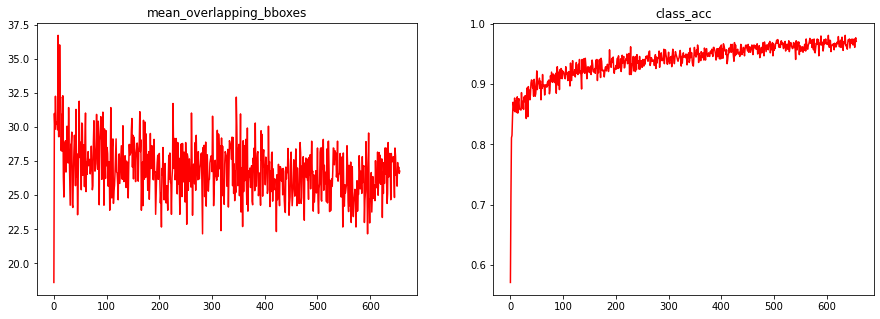

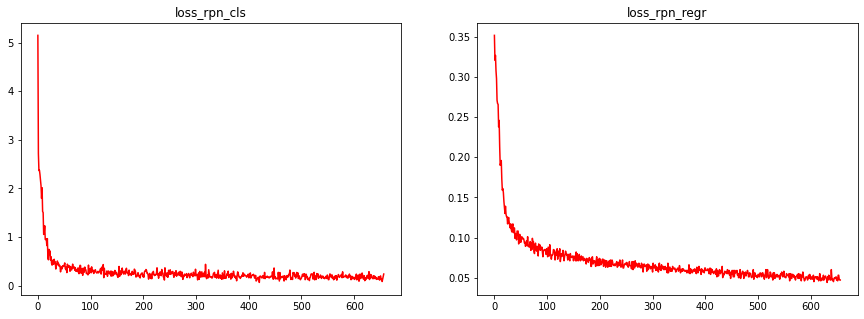

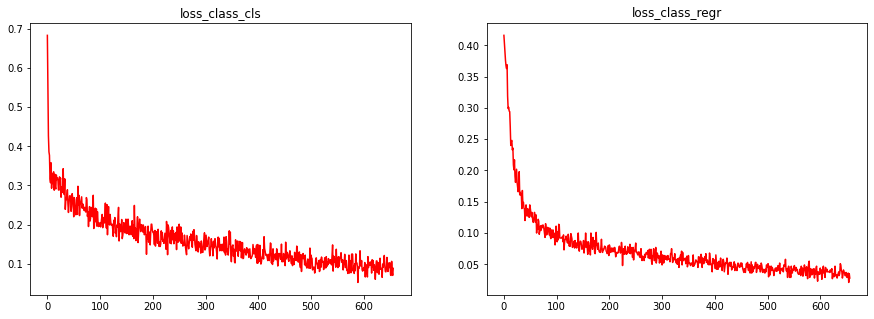

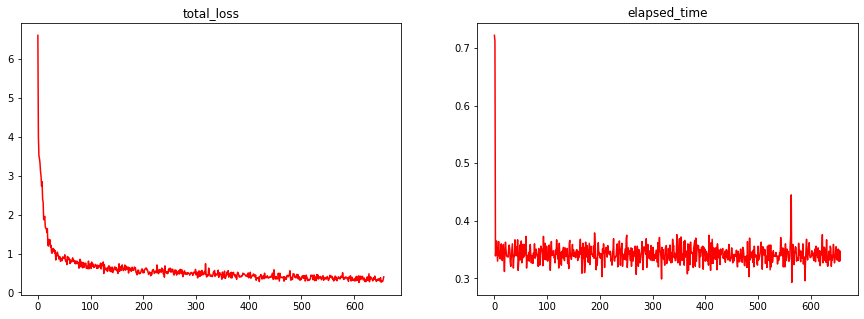

In [65]:
# Load the records
record_df = pd.read_csv(record_path)

r_epochs = len(record_df)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['mean_overlapping_bboxes'], 'r')
plt.title('mean_overlapping_bboxes')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['class_acc'], 'r')
plt.title('class_acc')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_cls'], 'r')
plt.title('loss_rpn_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_regr'], 'r')
plt.title('loss_rpn_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_cls'], 'r')
plt.title('loss_class_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_regr'], 'r')
plt.title('loss_class_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['curr_loss'], 'r')
plt.title('total_loss')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['elapsed_time'], 'r')
plt.title('elapsed_time')

plt.show()

In [66]:
ROOT_DIR = os.path.abspath(".")
img_folder = r"/home/mirandalv/Documents/github/geo_AnimalDetection/dataset/processing_small/clipped"

In [67]:
test_df = pd.read_csv(os.path.join(ROOT_DIR, "bounding_box_coordinates_ans.csv"))
test_df['name'] = test_df.apply(lambda x: x['img_name'].split('/')[-1], axis=1)
test_df['img_path'] = test_df.apply(lambda x: os.path.join(img_folder, x['name']), axis=1)


In [68]:
test_df

img_name  x1  y1  x2  y2  \
0    /home/cdsw/geo_Animal/geo_AnimalDetection/data...   8  20  52  48   
1    /home/cdsw/geo_Animal/geo_AnimalDetection/data...  12  20  52  44   
2    /home/cdsw/geo_Animal/geo_AnimalDetection/data...  12  16  52  48   
3    /home/cdsw/geo_Animal/geo_AnimalDetection/data...  -4  -4  12  24   
4    /home/cdsw/geo_Animal/geo_AnimalDetection/data...   8  16  56  44   
..                                                 ...  ..  ..  ..  ..   
524  /home/cdsw/geo_Animal/geo_AnimalDetection/data...   0  -4  16  16   
525  /home/cdsw/geo_Animal/geo_AnimalDetection/data...   8  20  52  44   
526  /home/cdsw/geo_Animal/geo_AnimalDetection/data...   8  20  52  44   
527  /home/cdsw/geo_Animal/geo_AnimalDetection/data...  16  20  56  44   
528  /home/cdsw/geo_Animal/geo_AnimalDetection/data...  16  44  64  68   

        name                                           img_path  
0    230.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
1    391.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
2    137.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
3    137.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
4    466.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
..       ...                                                ...  
524  149.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
525  351.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
526  116.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
527  511.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
528  511.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  

[529 rows x 7 columns]

In [58]:
img_count = test_df['name'].unique()

In [59]:
def plot_bbox_plt(img_name):
    
    img_url = test_df.loc[test_df["name"]==img_name]['img_path'].values[0]
    
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    image = plt.imread(img_url)
    plt.imshow(image)

    # iterating over the image for different objects
    for _,row in test_df[test_df.name == img_name].iterrows():
        
        """
        xmin = row.miny
        xmax = row.maxy
        ymin = row.maxx
        ymax = row.minx
        """
        
        xmin = row.x1
        xmax = row.x2
        ymin = row.y1
        ymax = row.y2

        
        width = xmax - xmin
        height = ymax - ymin
    
        # assign different color to different classes of objects
        edgecolor = 'r'
        a = 5
        b = 5
        ax.annotate('bird', xy=(xmax-a,ymin+b))
        
        
        # add bounding boxes to the image
        rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

        ax.add_patch(rect)

In [60]:
img_names = test_df["name"].value_counts().tail(50).index.values

In [61]:
img_names = test_df["name"].value_counts().index.values

In [62]:
img_names

array(['118.tif', '268.tif', '156.tif', '513.tif', '65.tif', '281.tif',
       '269.tif', '325.tif', '381.tif', '309.tif', '306.tif', '507.tif',
       '124.tif', '293.tif', '201.tif', '250.tif', '62.tif', '36.tif',
       '416.tif', '408.tif', '141.tif', '117.tif', '112.tif', '380.tif',
       '57.tif', '39.tif', '260.tif', '54.tif', '53.tif', '459.tif',
       '128.tif', '423.tif', '262.tif', '541.tif', '505.tif', '41.tif',
       '182.tif', '278.tif', '440.tif', '332.tif', '296.tif', '220.tif',
       '339.tif', '298.tif', '256.tif', '311.tif', '188.tif', '388.tif',
       '238.tif', '197.tif', '285.tif', '140.tif', '379.tif', '78.tif',
       '52.tif', '203.tif', '161.tif', '68.tif', '504.tif', '105.tif',
       '326.tif', '237.tif', '330.tif', '144.tif', '209.tif', '211.tif',
       '135.tif', '499.tif', '333.tif', '511.tif', '525.tif', '232.tif',
       '195.tif', '76.tif', '239.tif', '402.tif', '246.tif', '249.tif',
       '323.tif', '155.tif', '315.tif', '133.tif', '426.tif', '

/home/mirandalv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


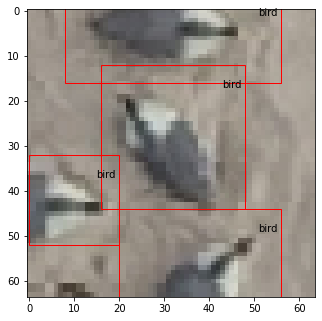

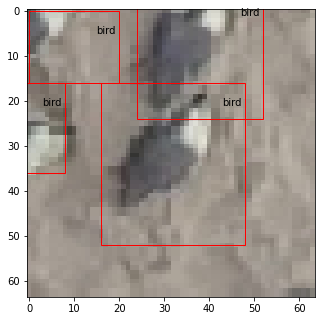

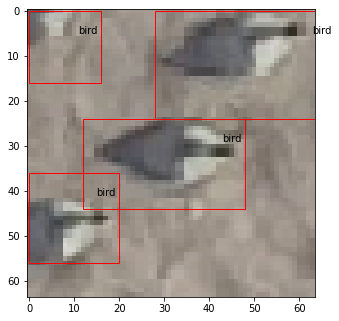

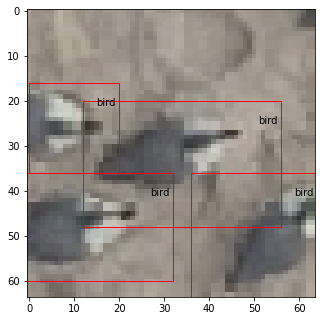

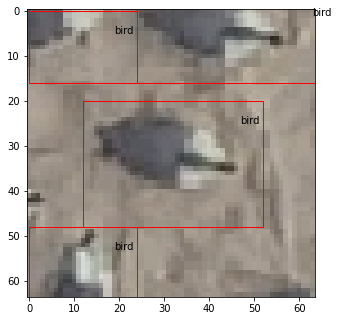

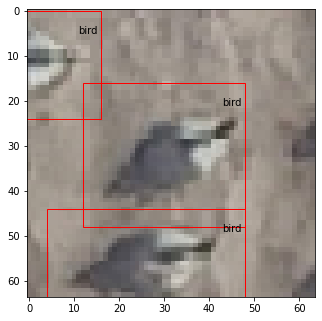

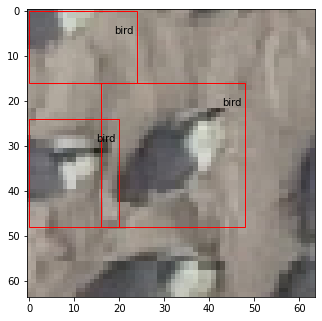

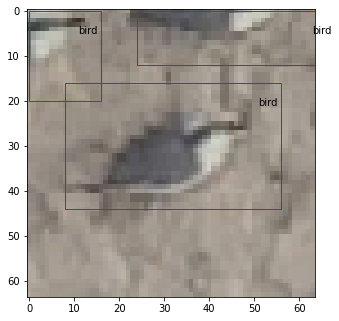

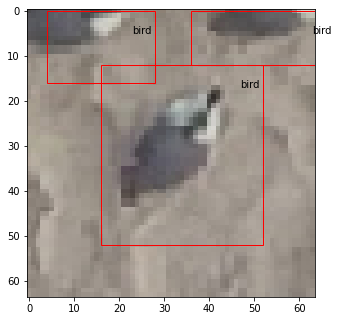

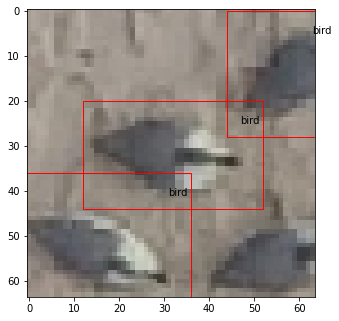

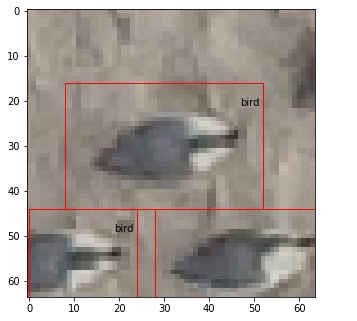

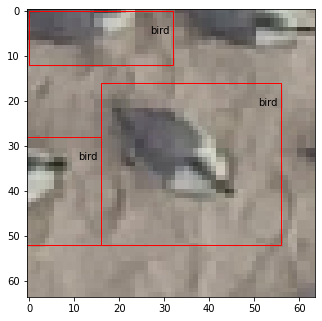

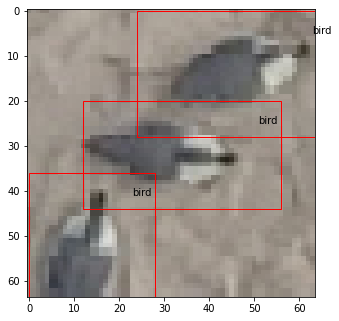

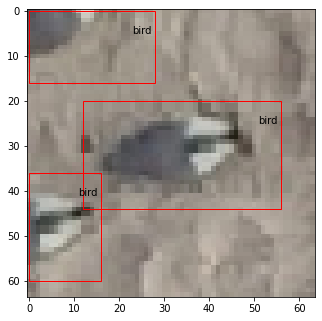

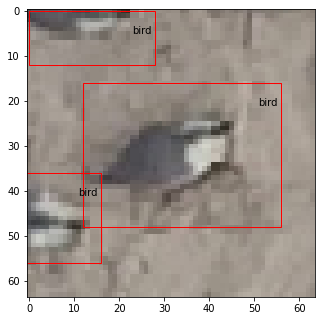

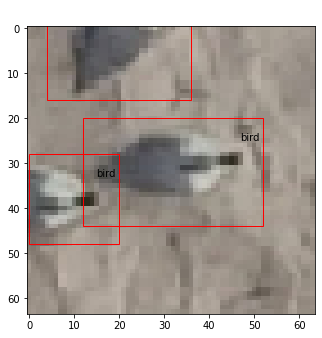

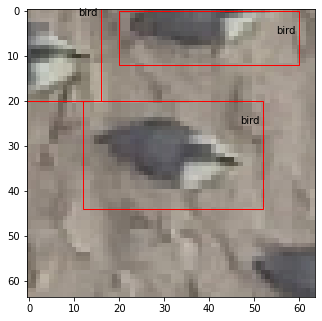

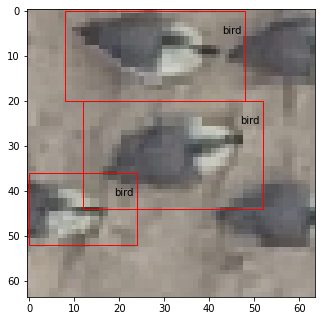

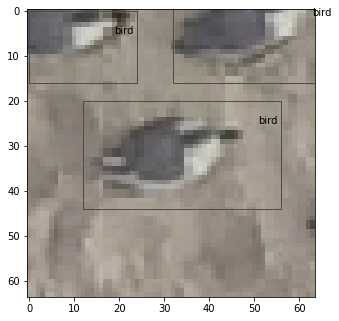

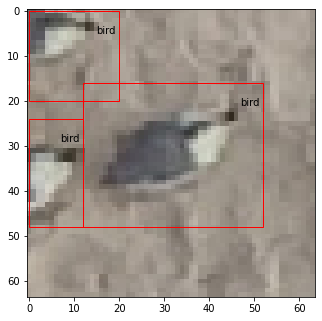

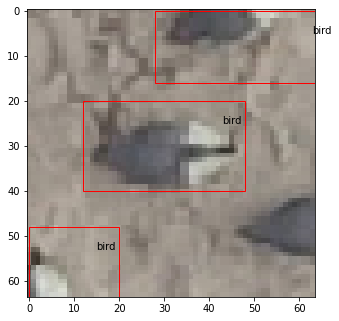

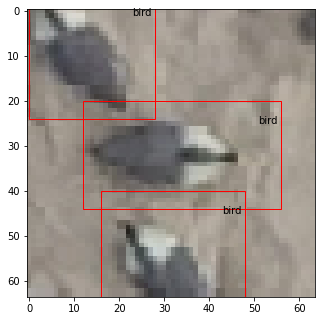

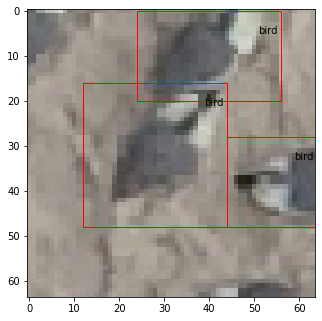

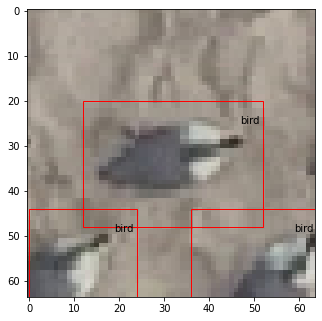

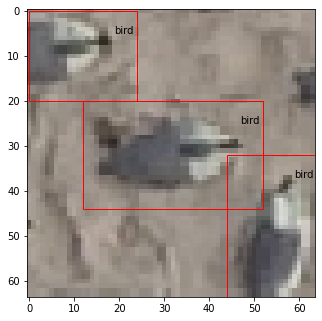

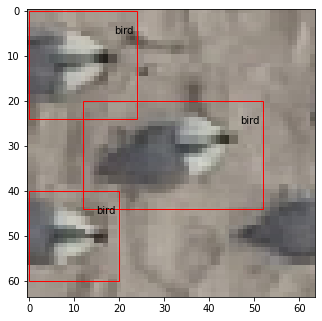

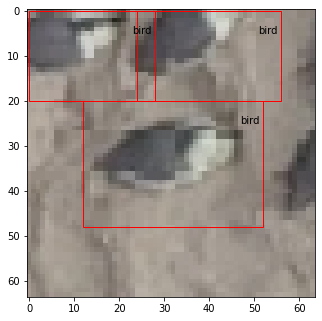

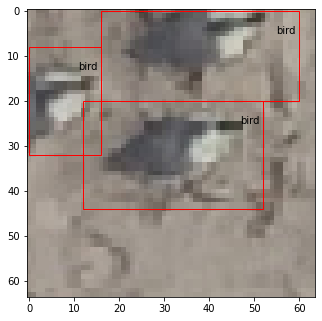

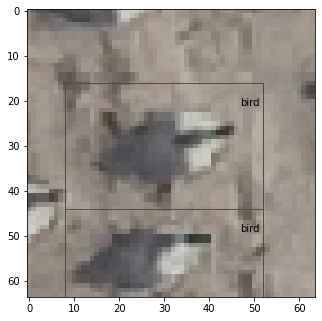

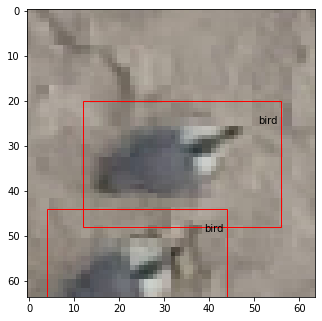

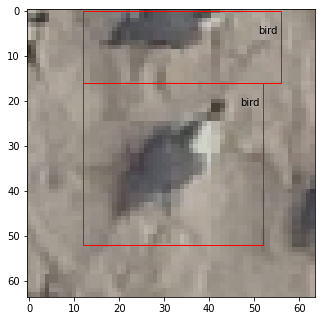

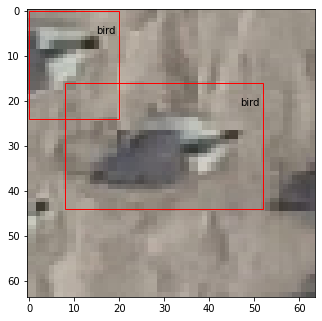

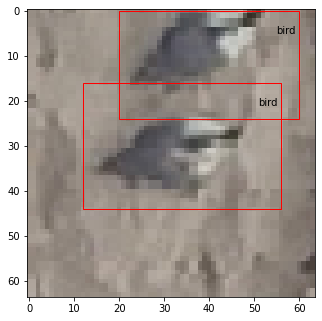

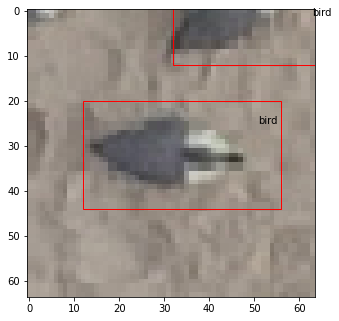

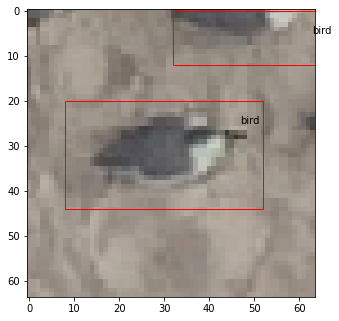

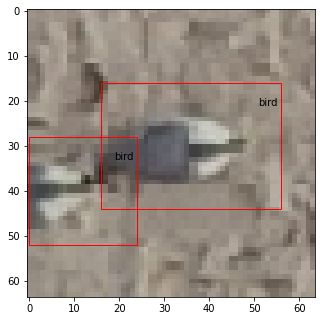

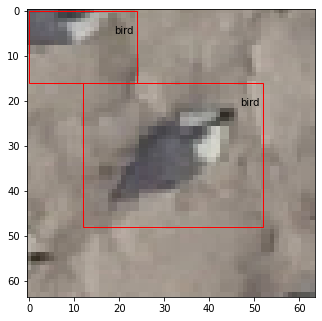

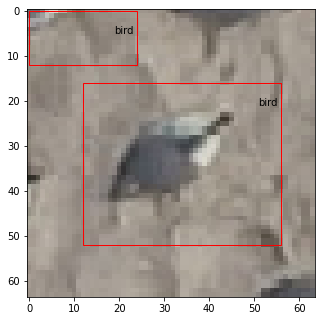

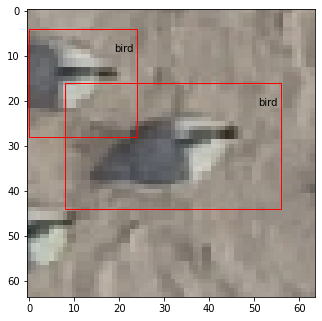

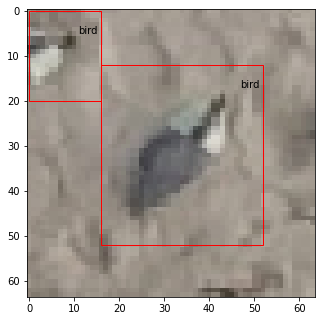

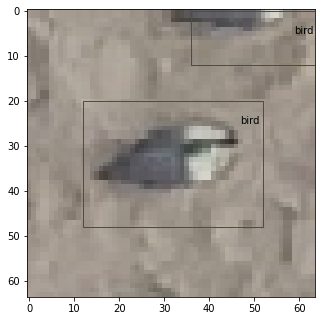

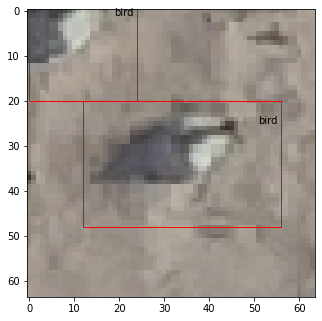

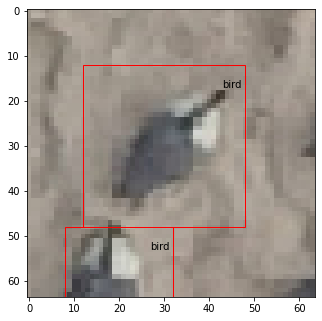

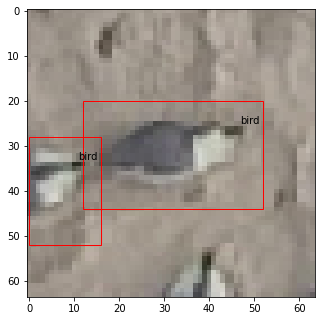

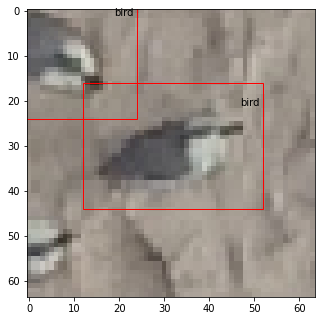

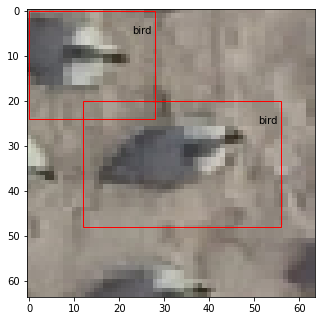

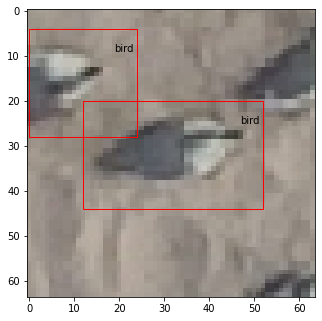

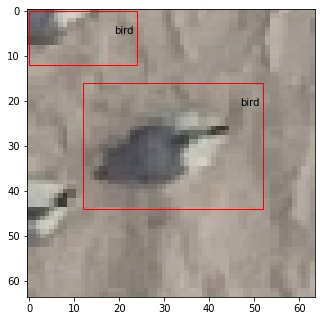

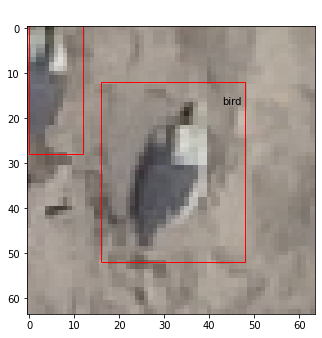

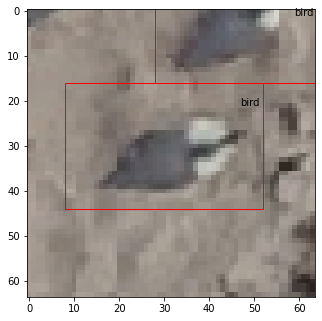

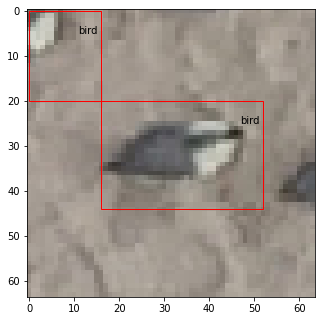

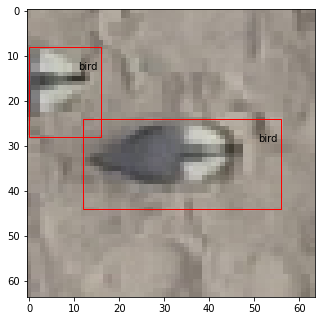

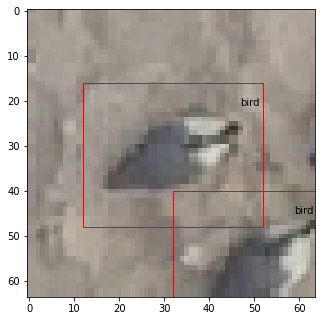

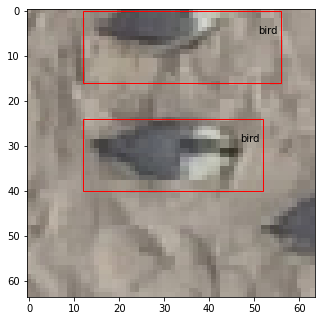

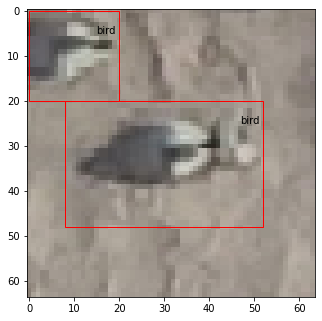

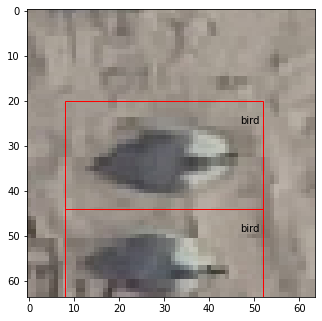

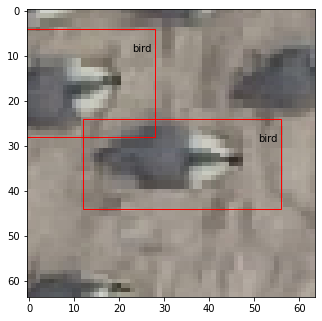

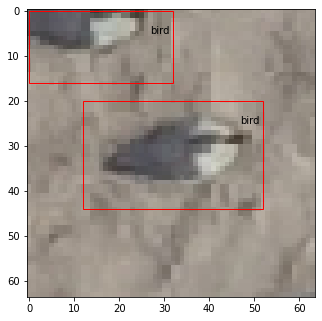

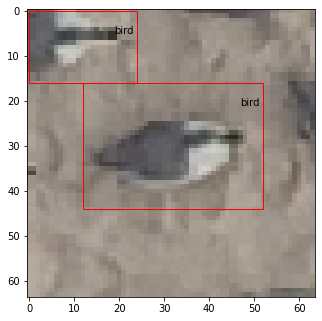

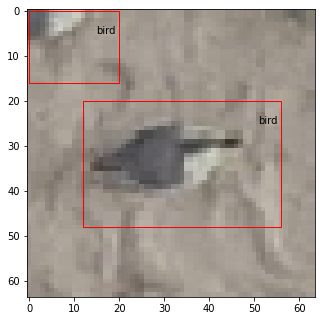

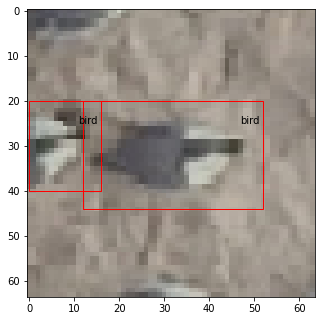

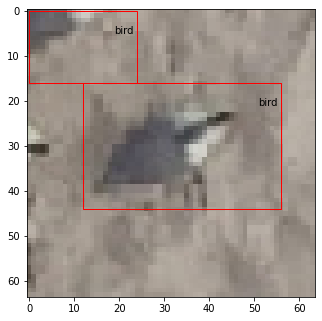

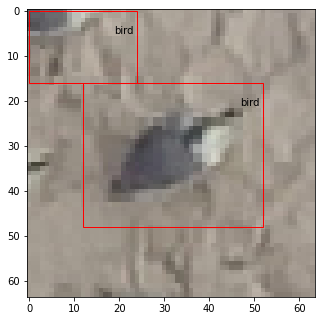

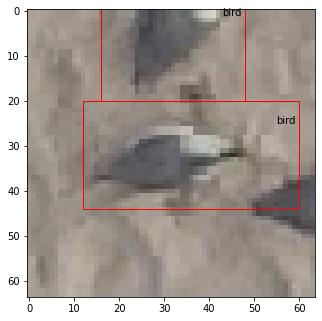

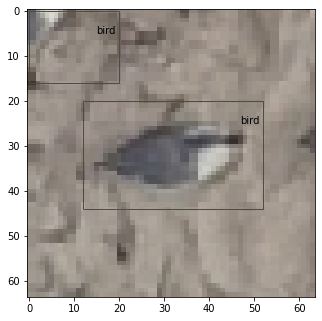

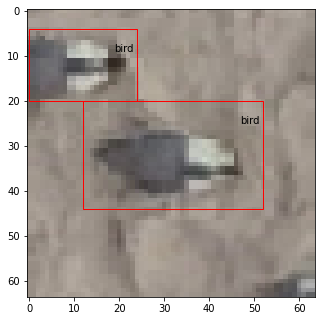

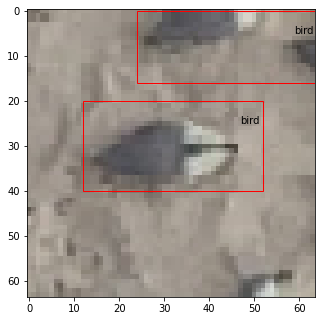

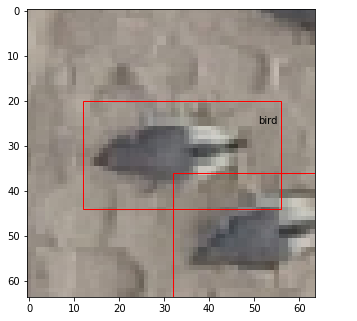

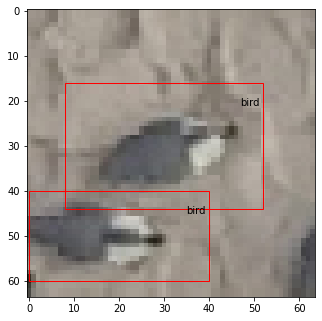

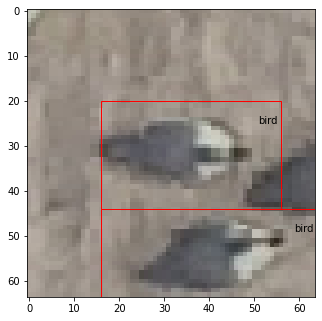

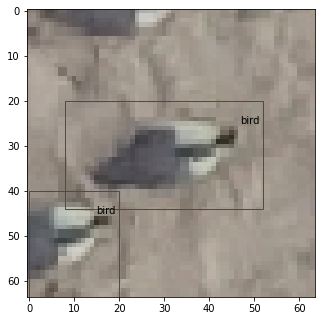

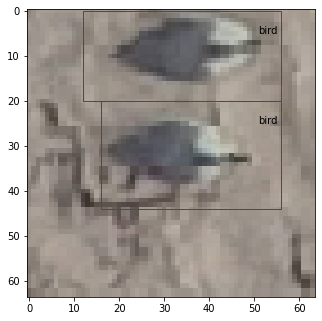

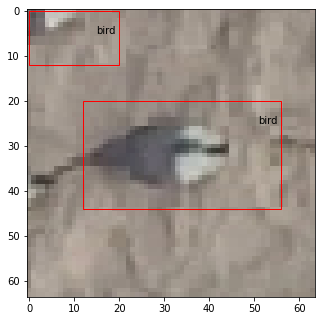

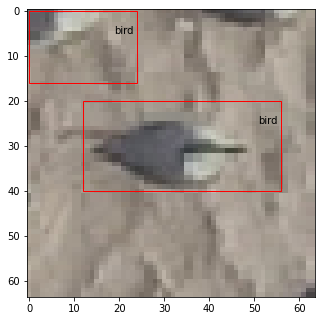

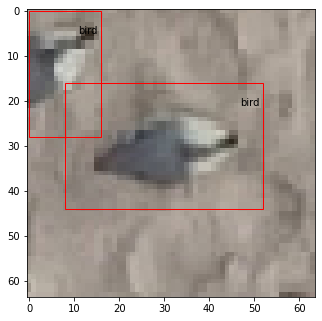

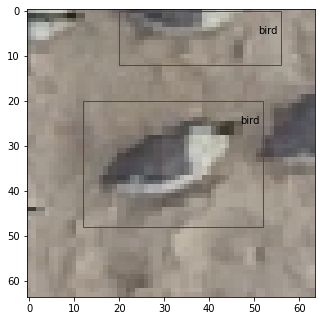

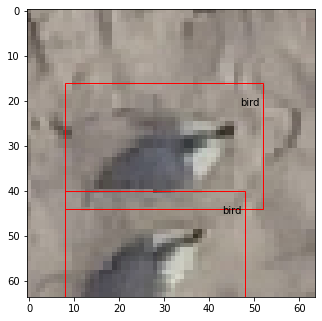

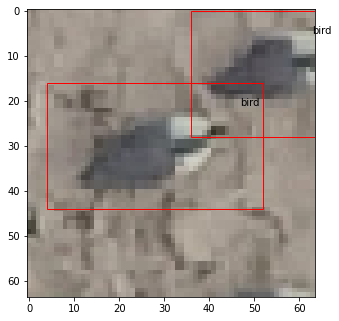

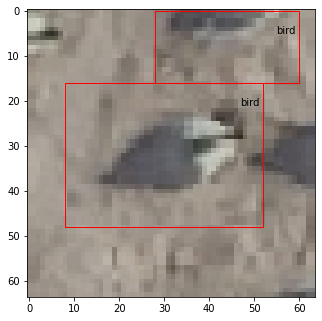

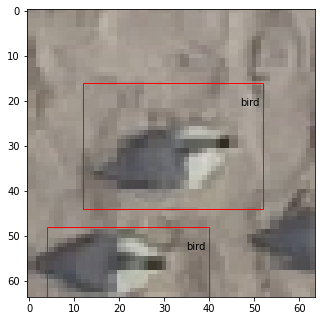

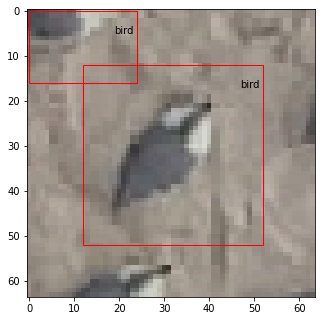

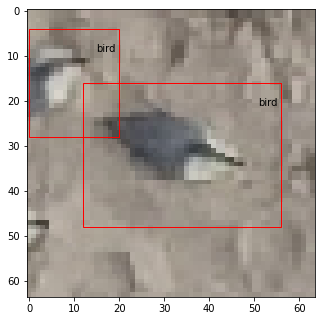

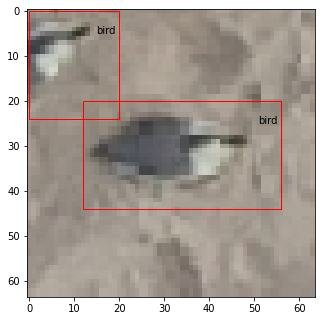

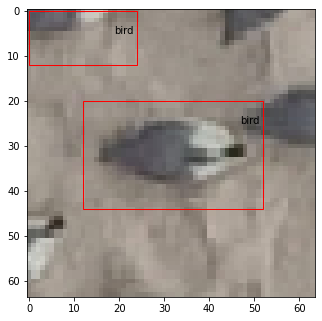

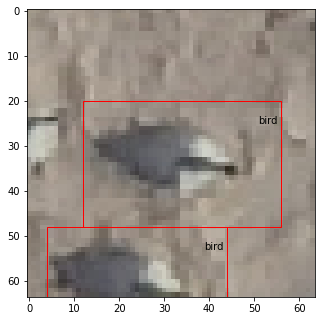

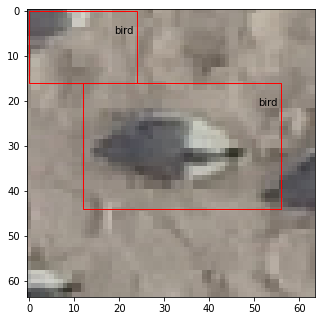

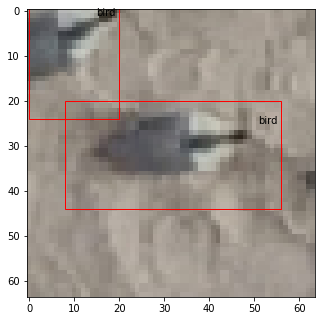

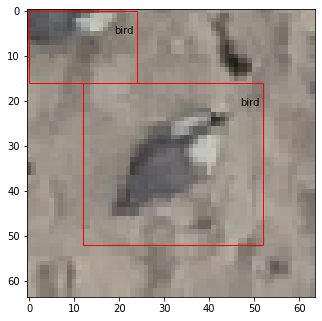

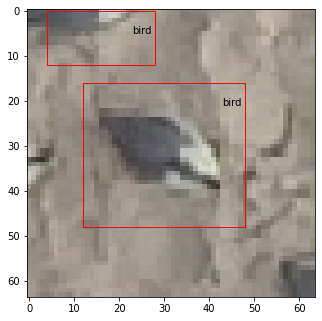

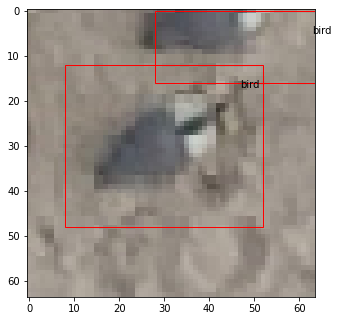

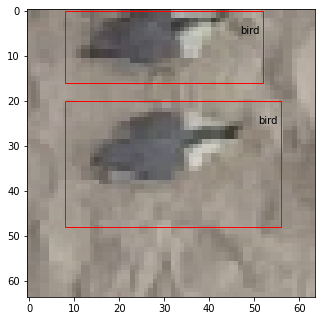

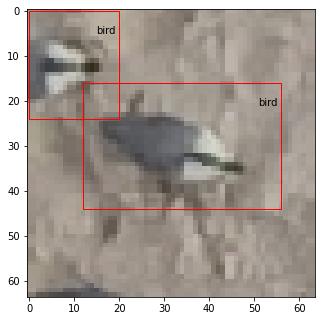

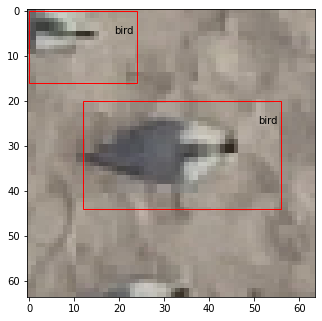

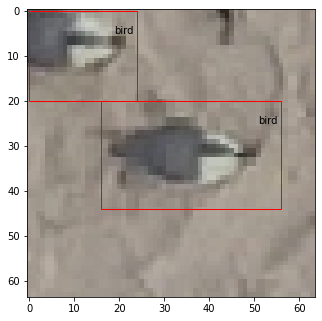

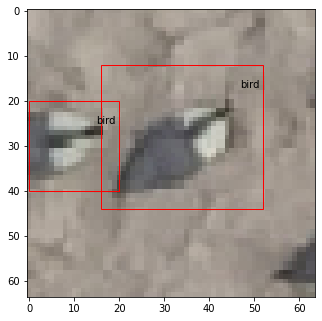

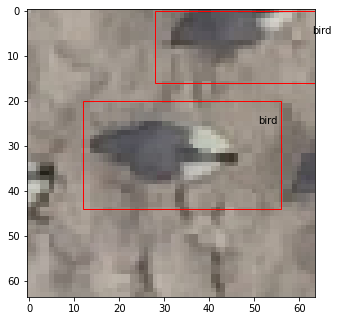

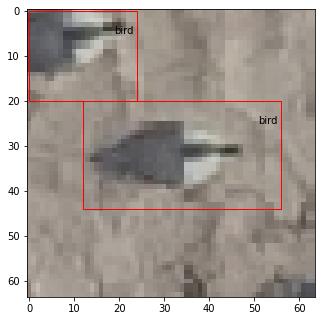

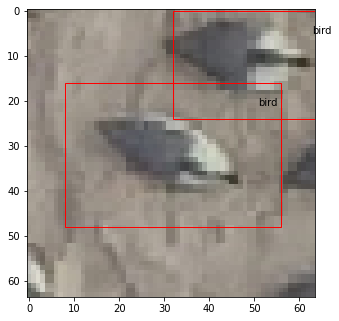

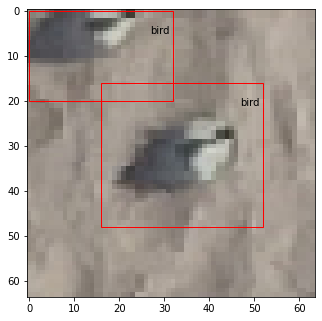

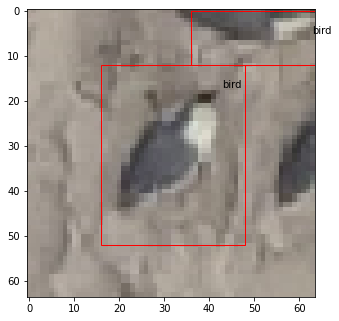

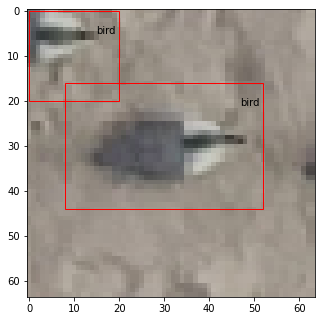

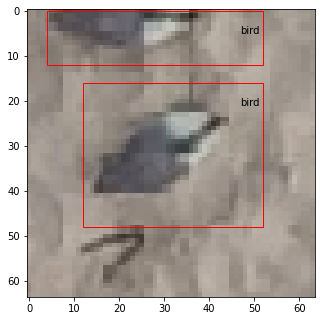

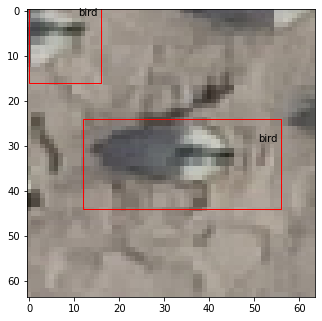

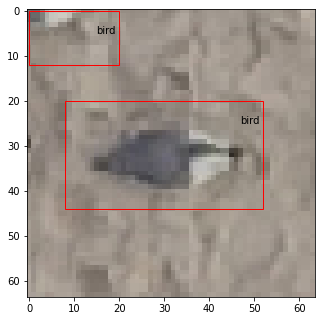

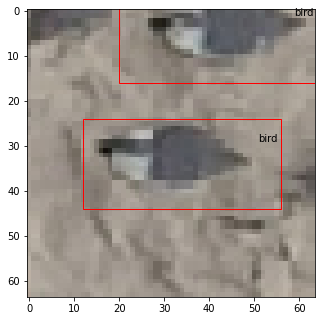

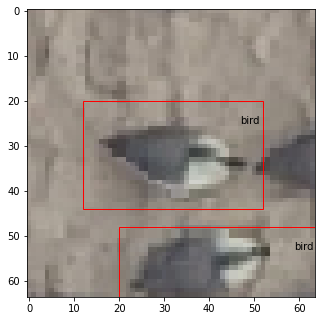

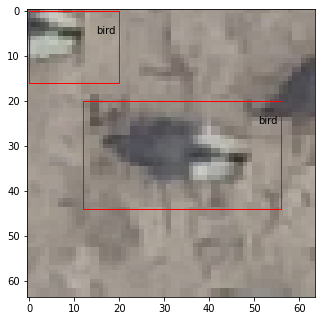

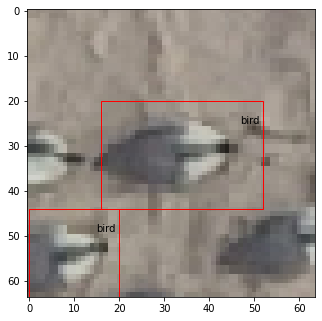

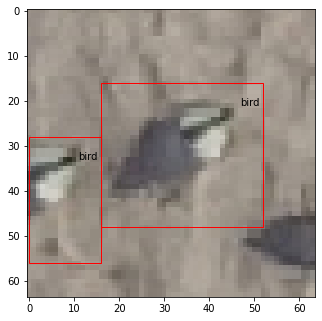

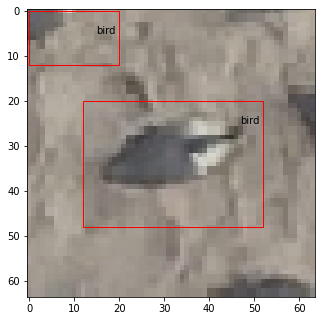

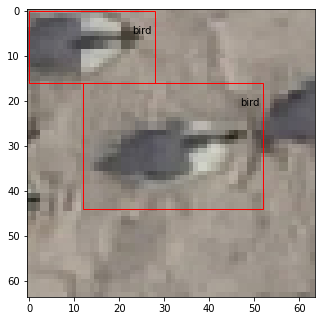

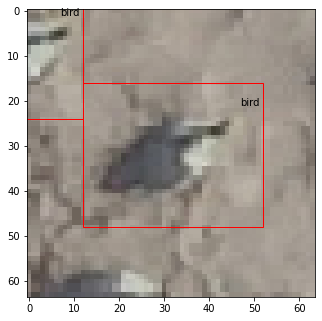

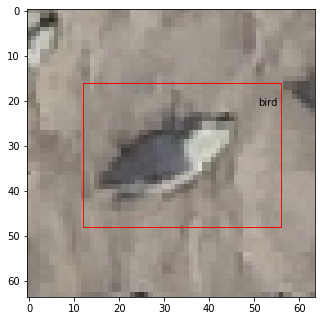

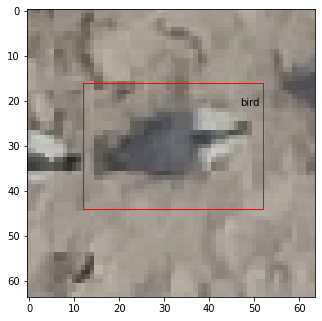

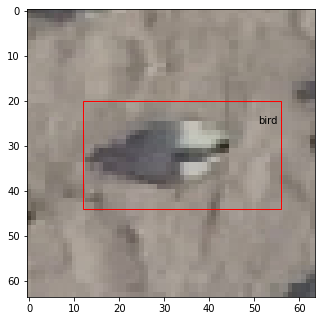

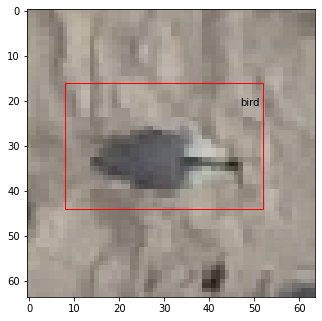

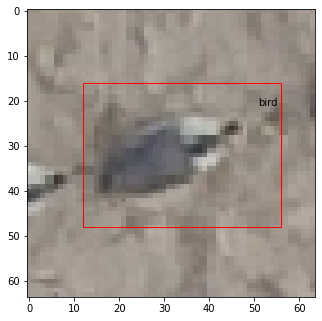

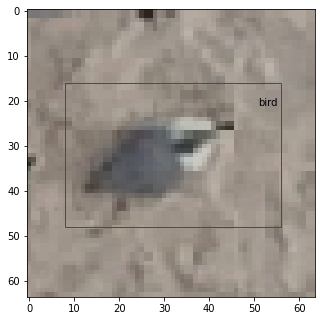

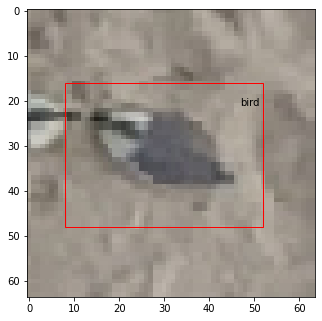

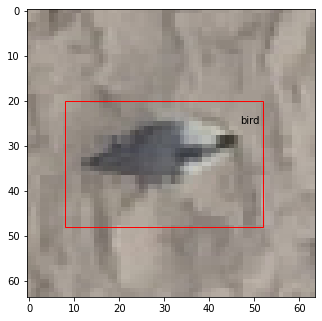

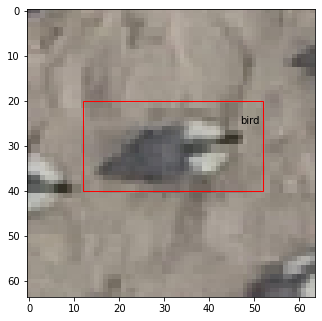

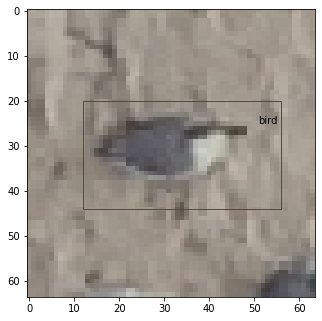

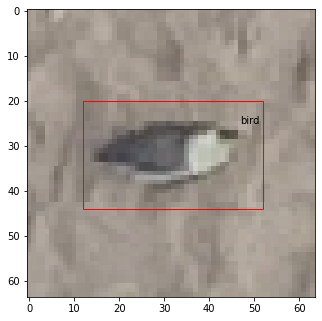

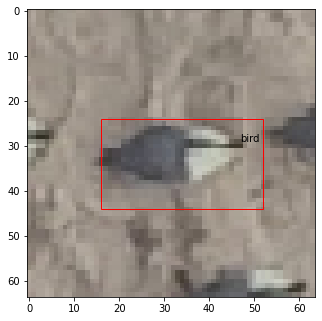

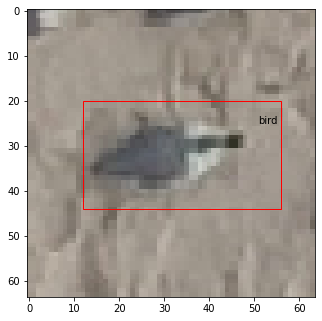

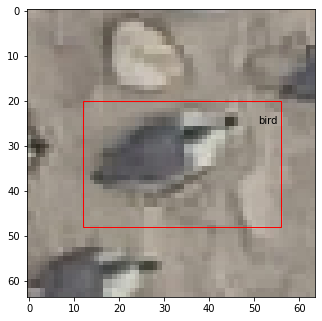

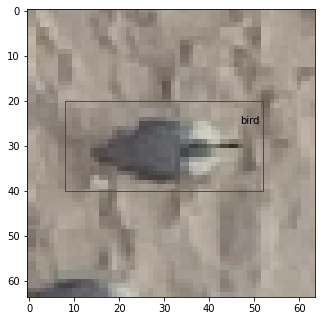

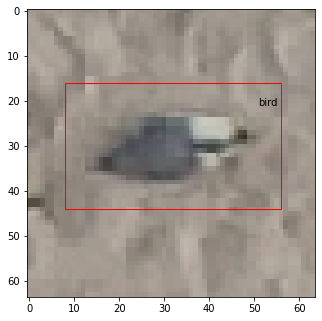

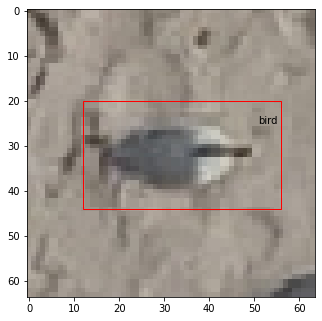

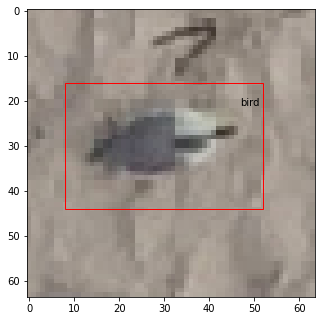

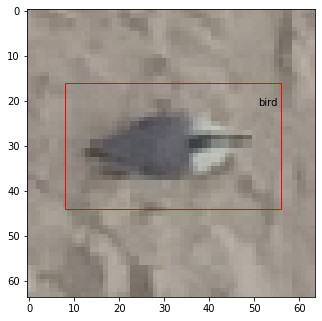

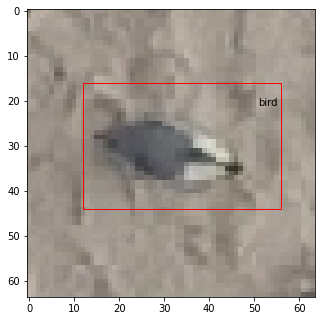

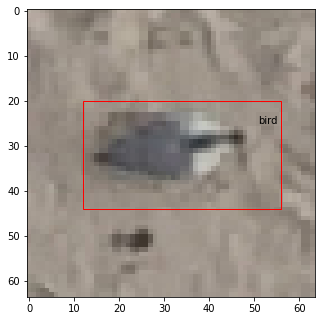

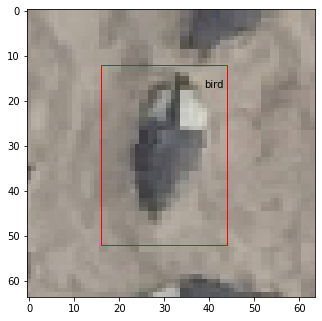

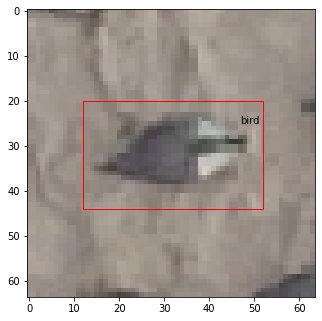

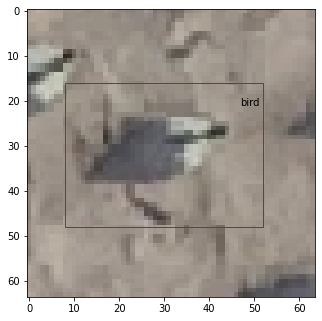

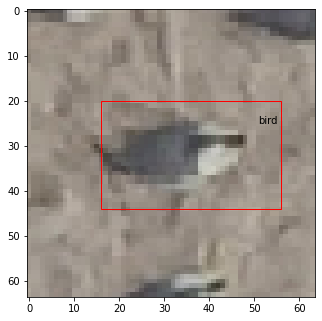

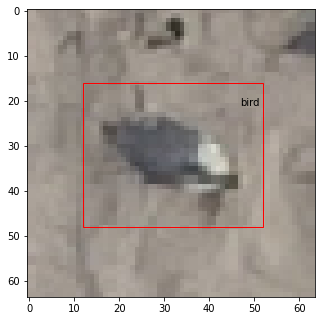

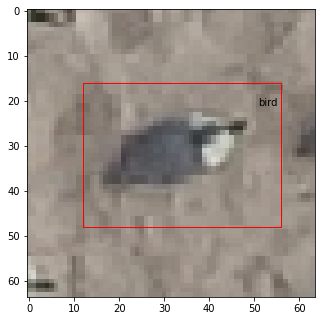

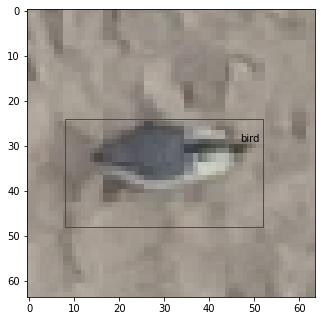

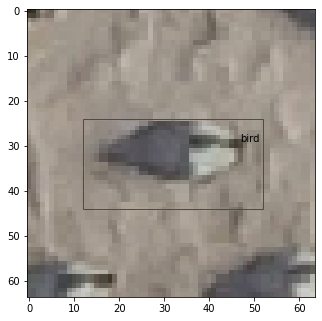

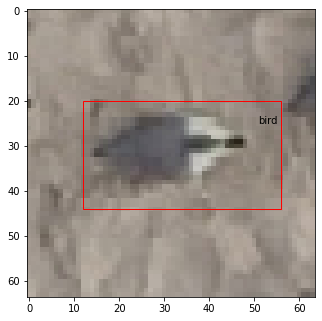

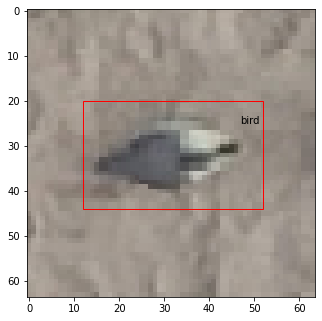

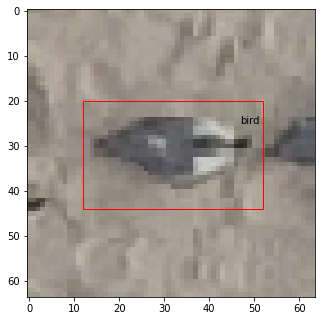

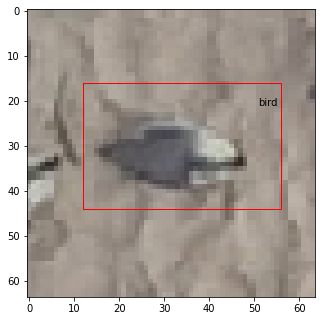

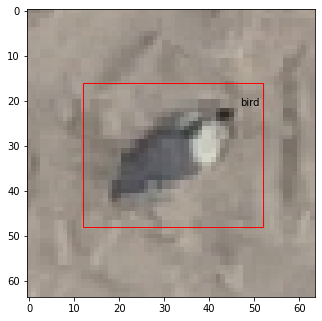

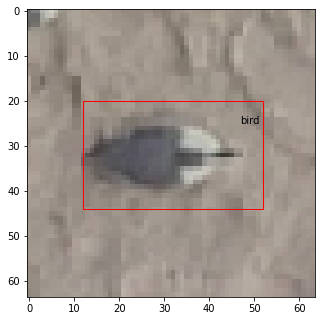

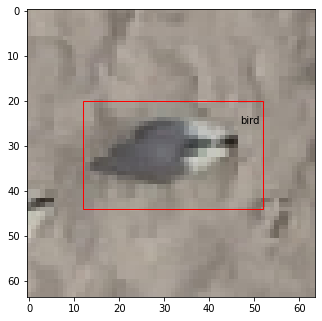

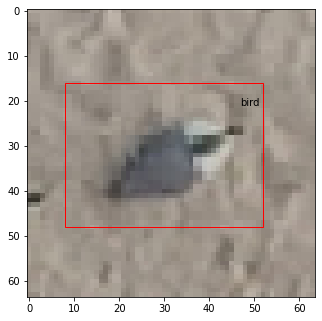

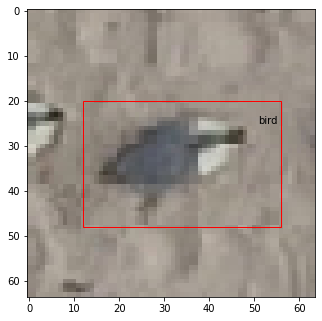

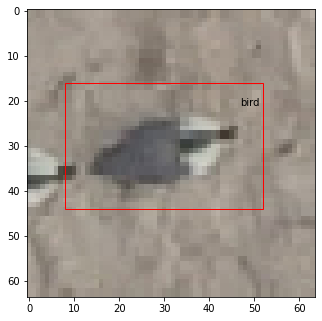

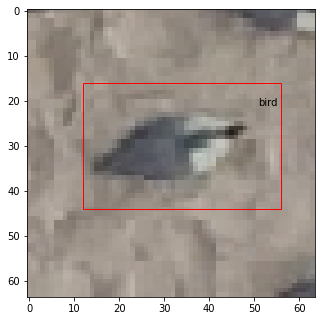

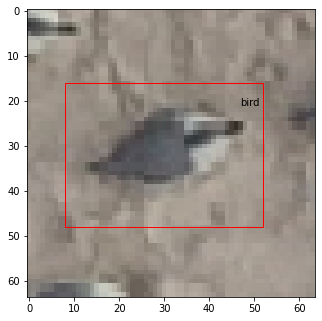

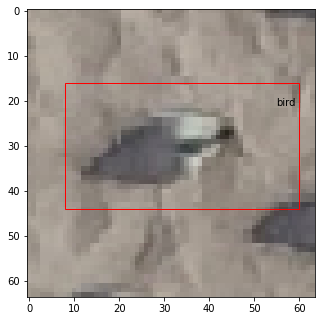

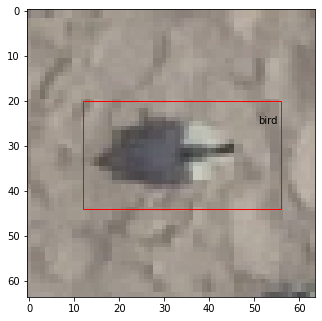

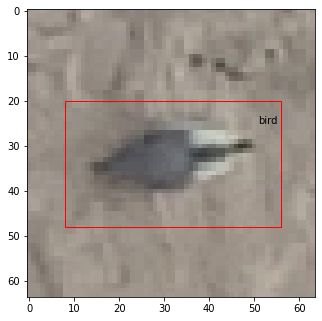

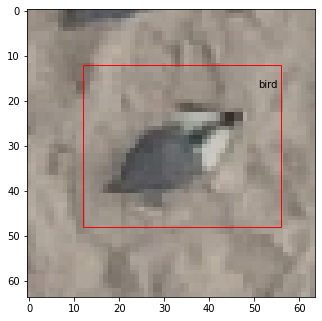

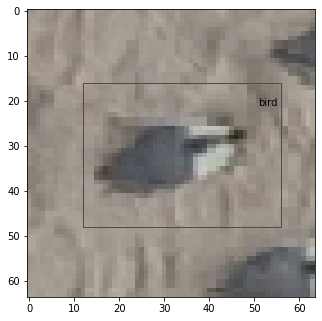

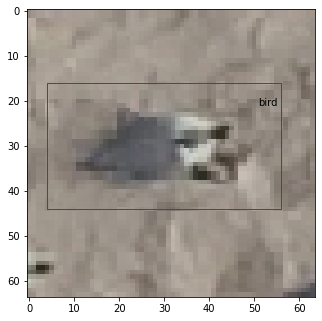

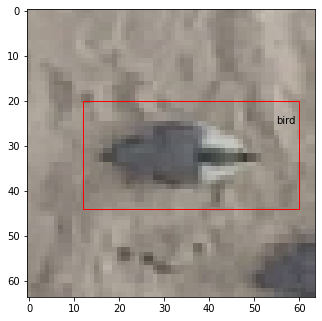

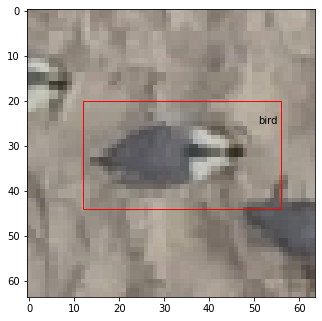

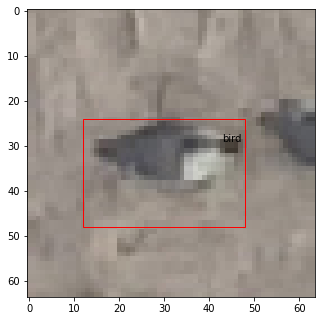

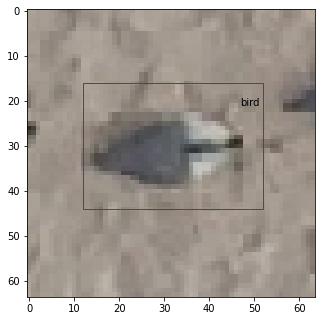

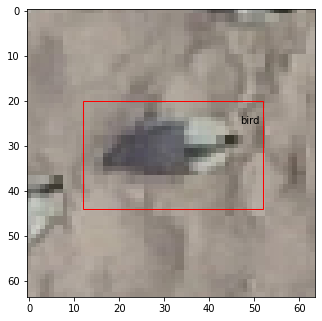

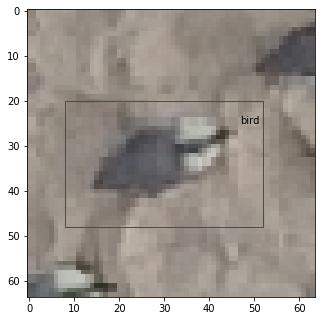

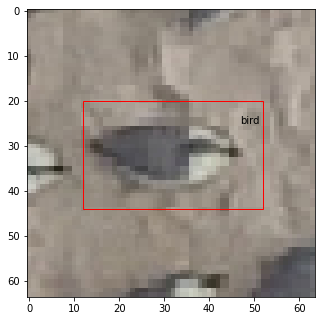

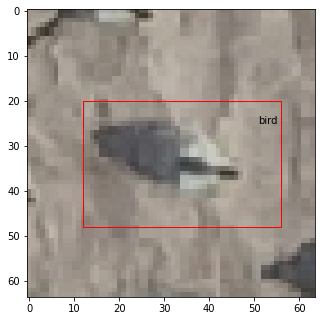

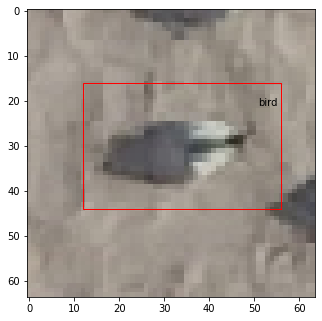

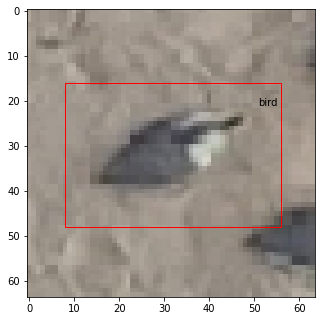

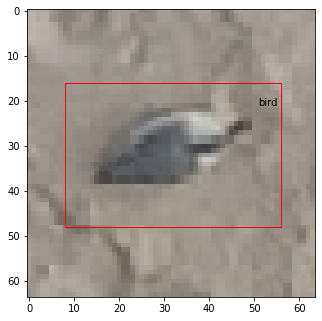

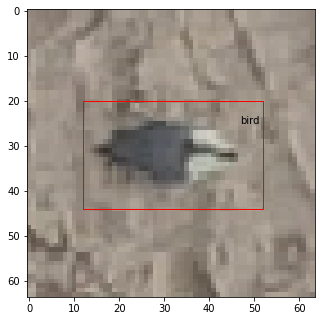

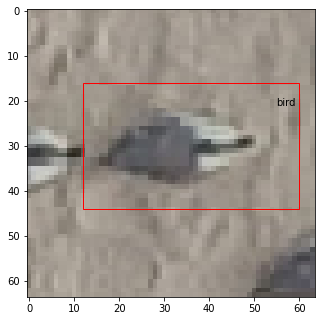

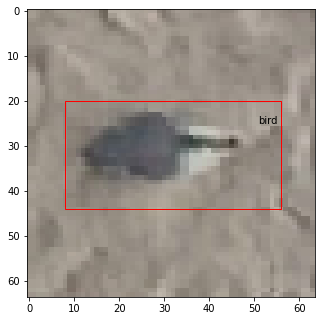

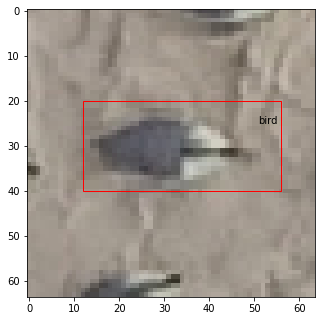

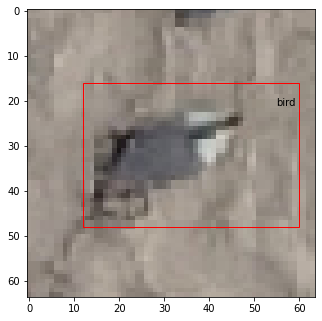

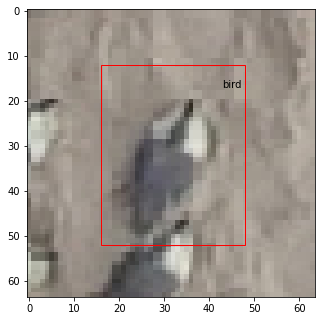

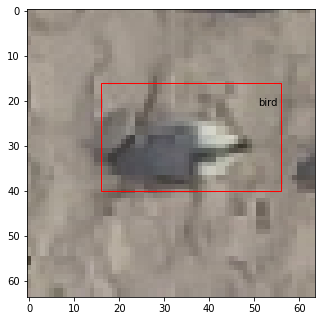

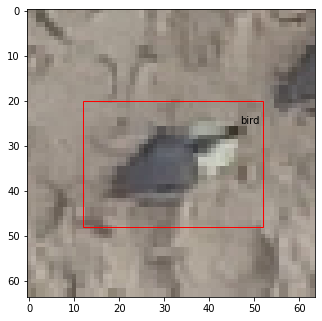

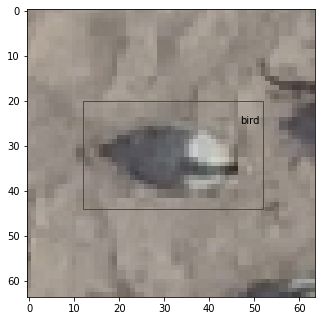

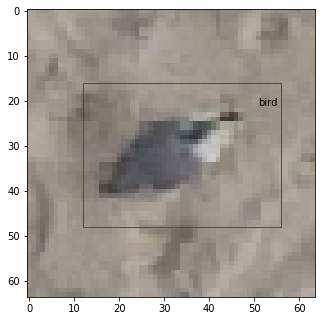

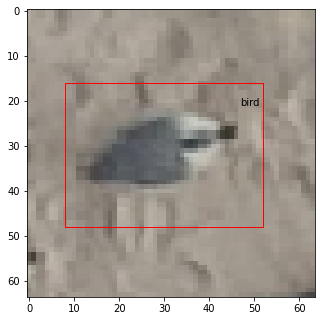

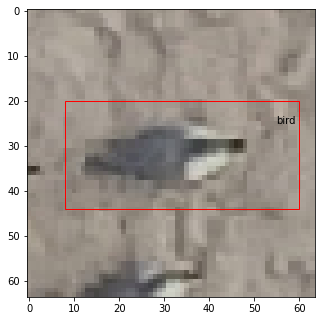

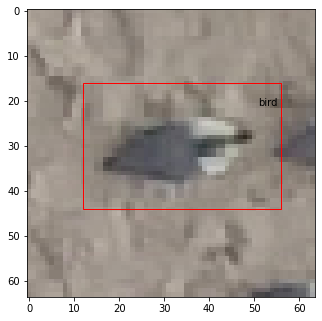

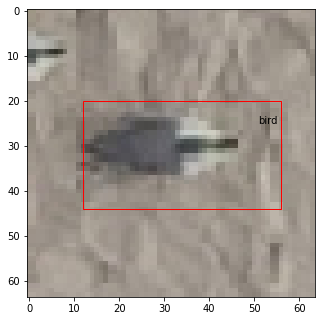

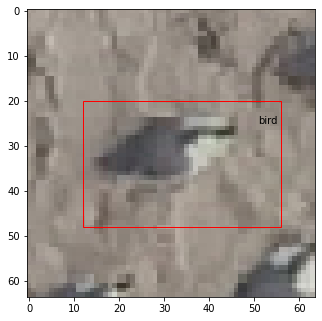

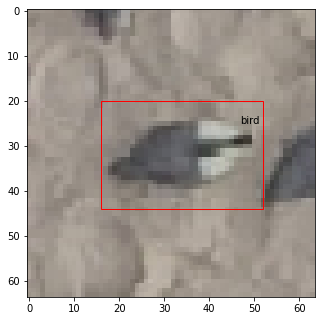

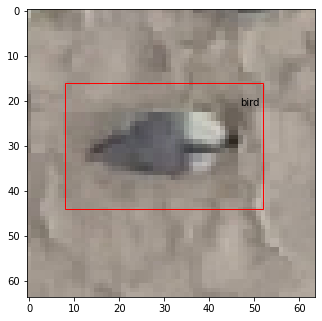

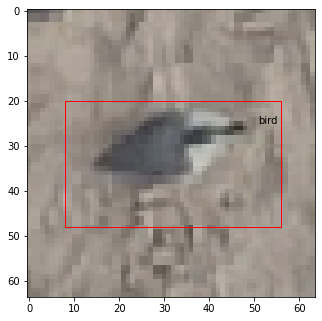

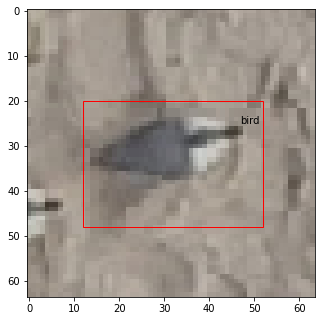

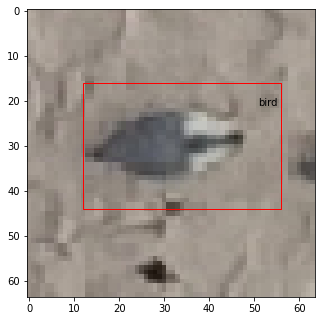

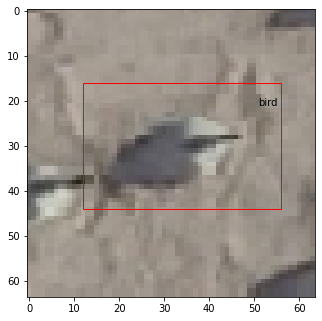

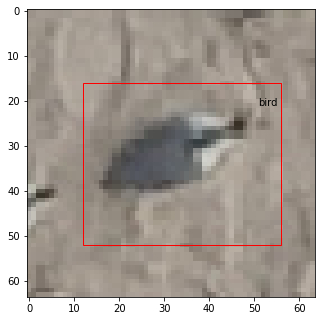

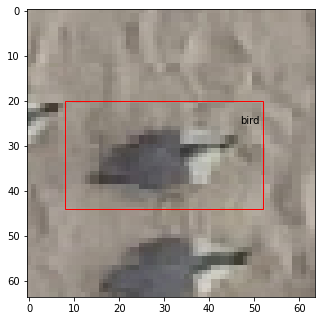

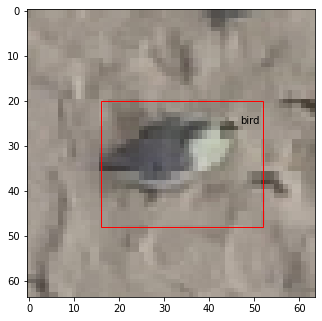

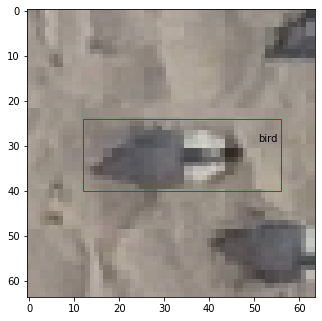

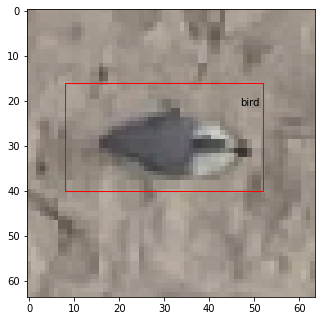

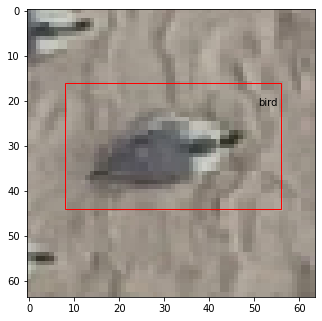

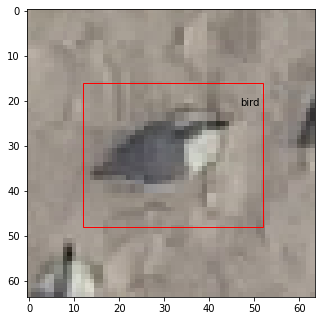

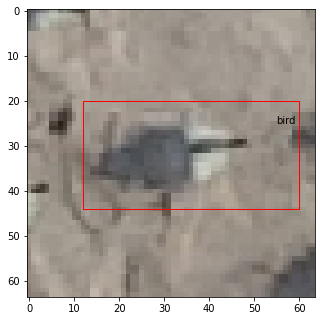

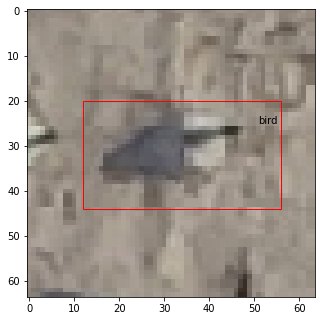

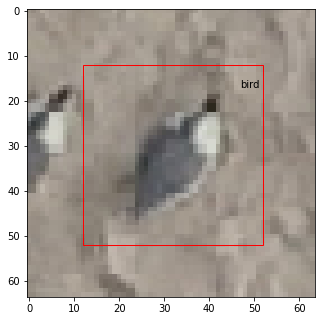

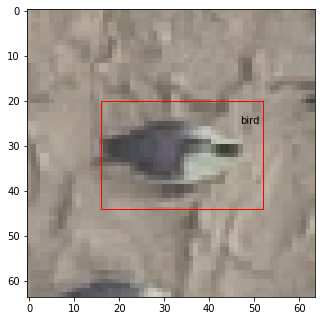

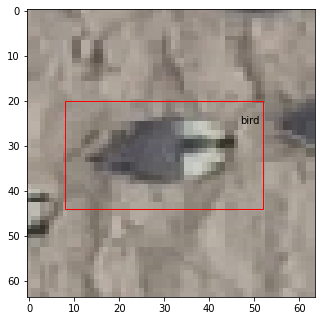

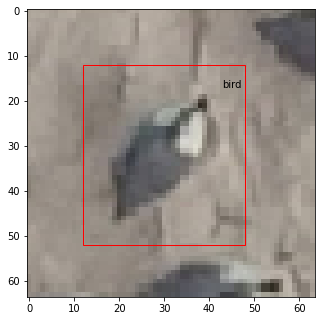

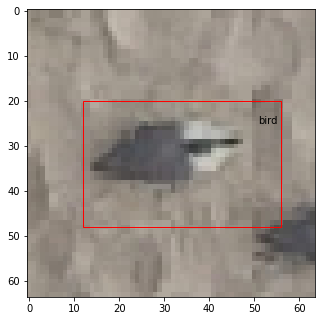

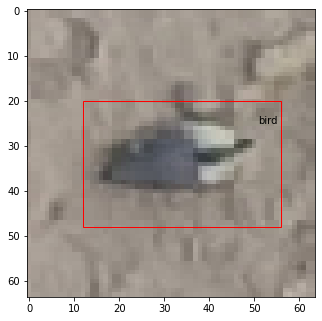

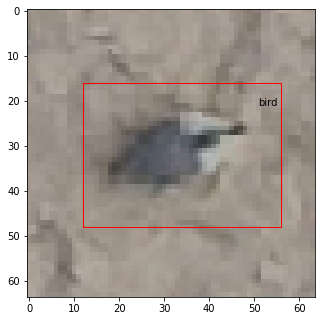

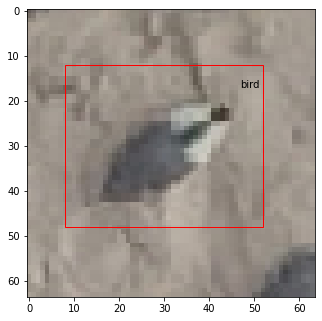

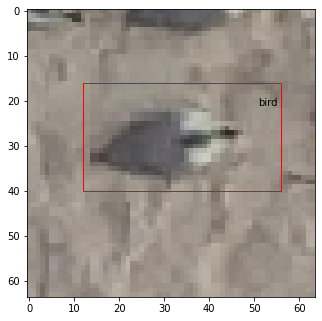

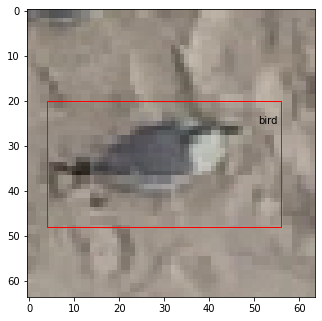

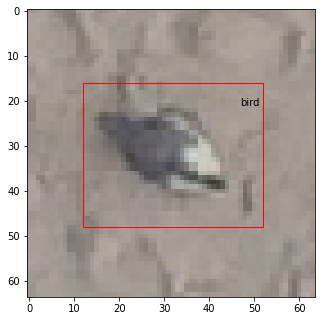

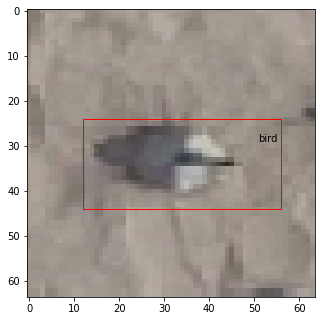

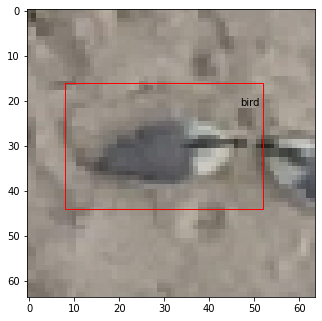

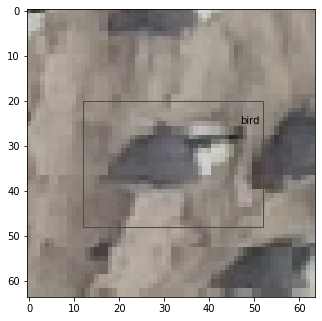

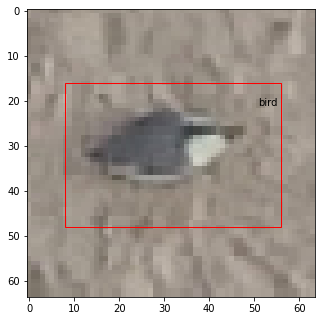

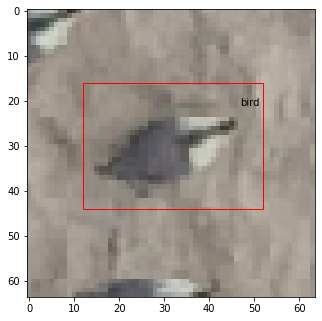

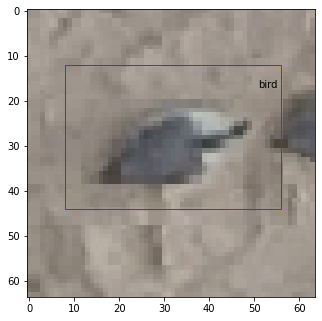

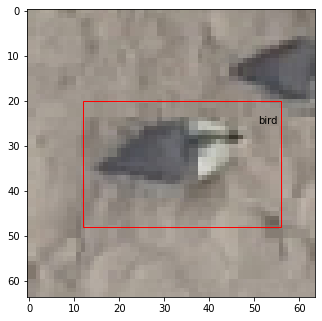

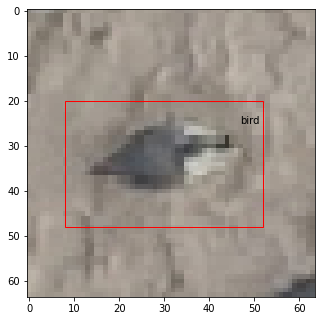

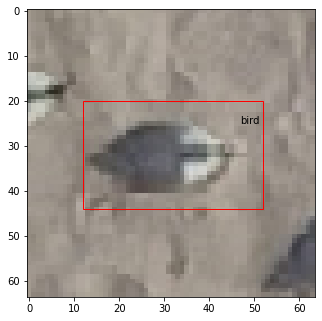

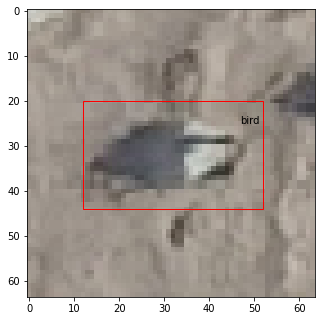

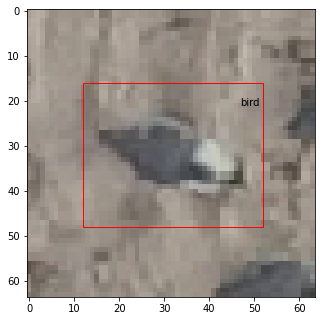

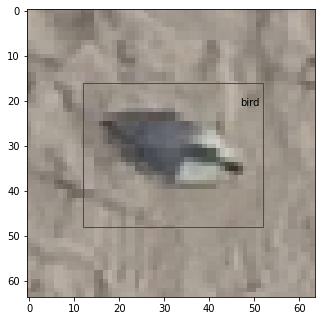

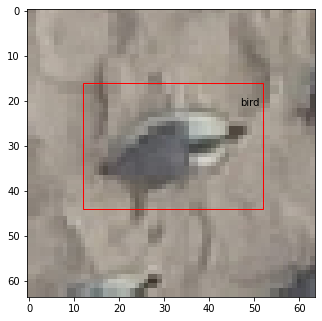

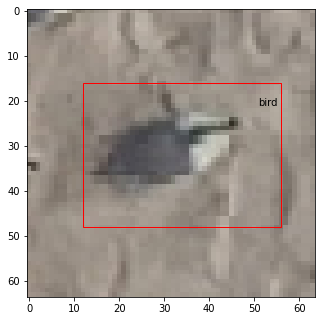

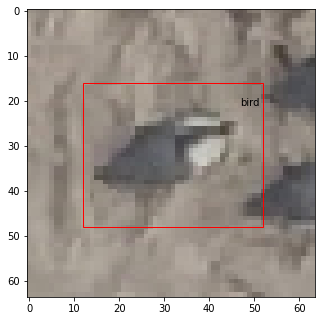

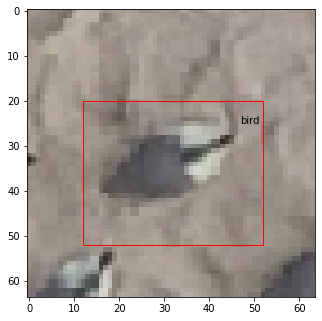

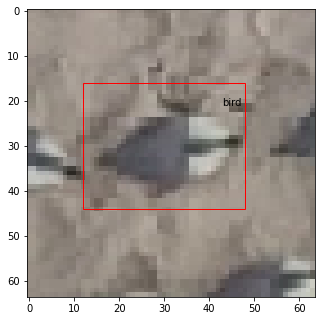

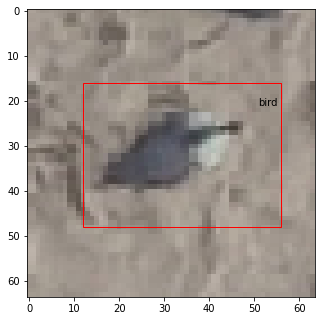

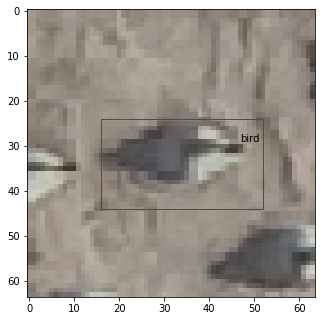

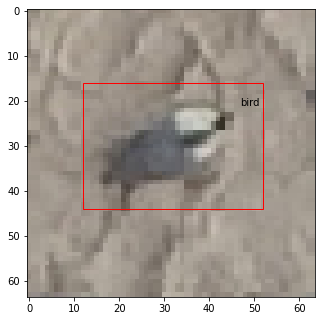

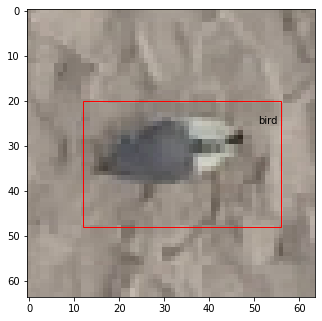

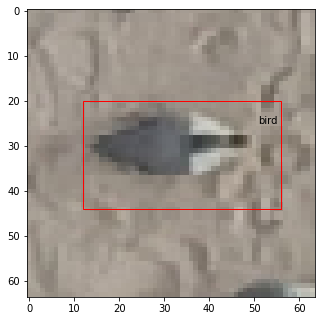

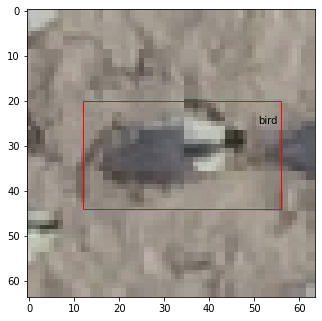

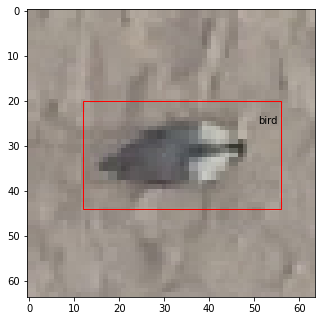

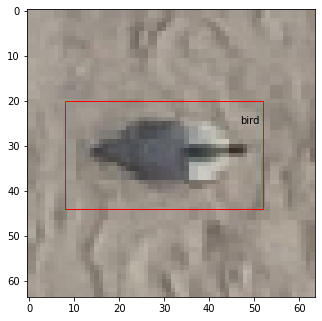

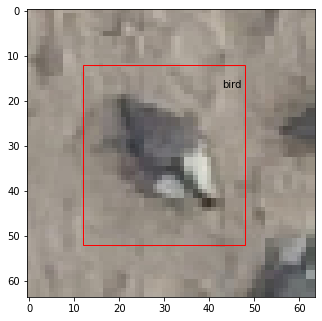

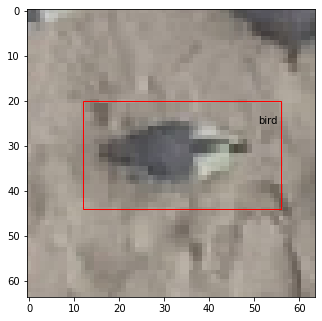

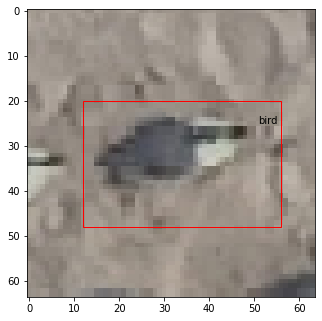

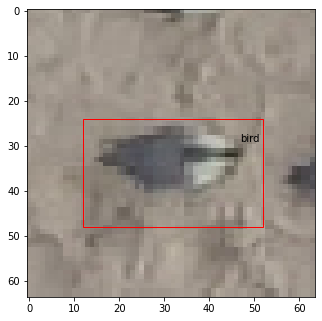

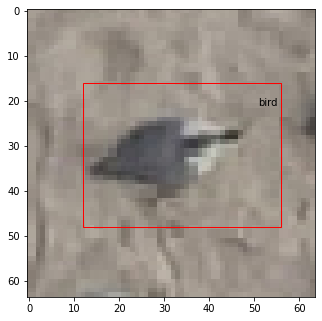

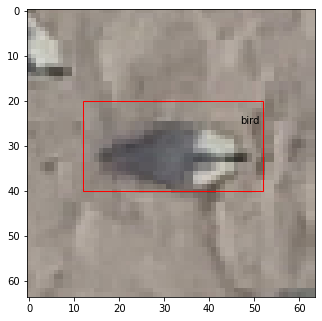

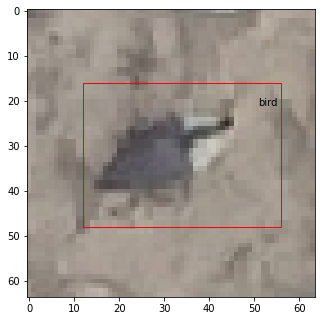

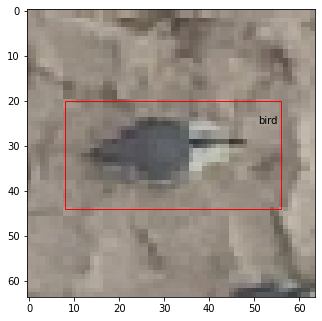

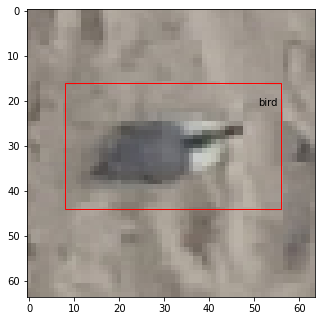

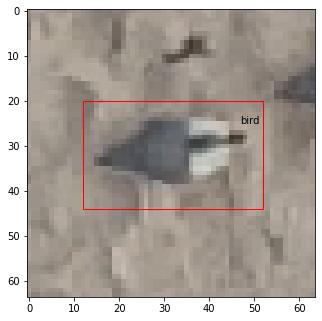

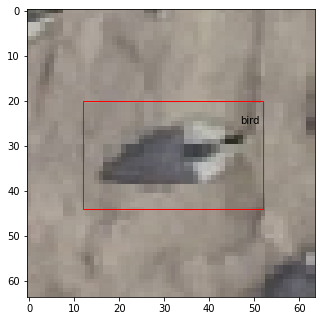

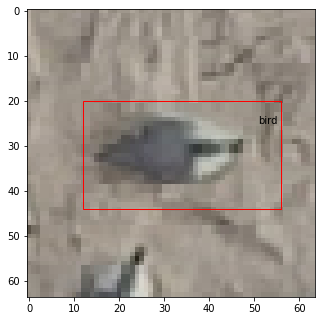

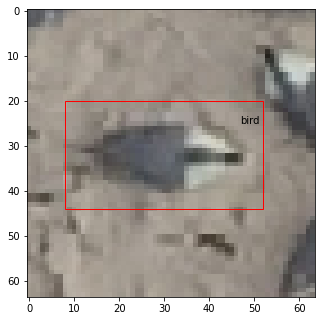

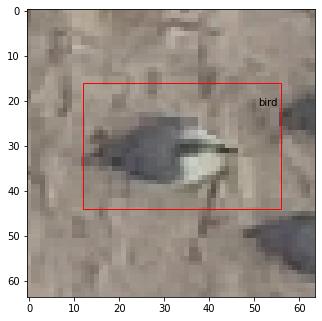

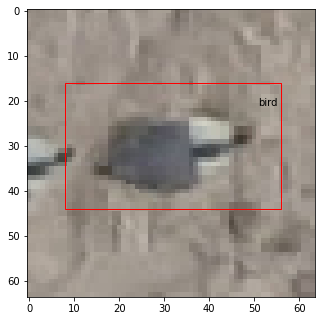

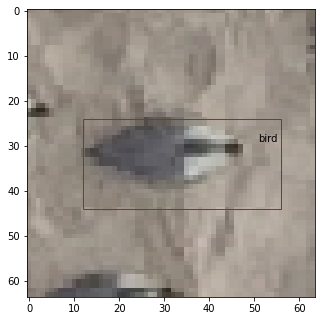

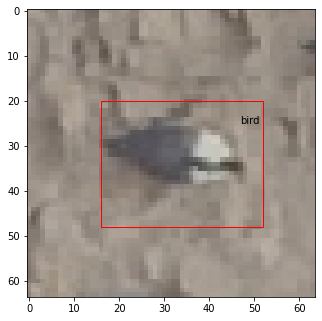

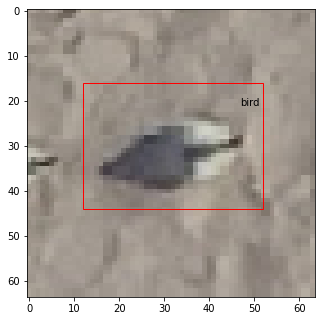

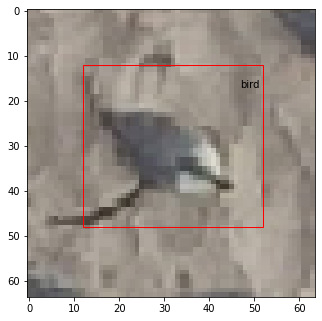

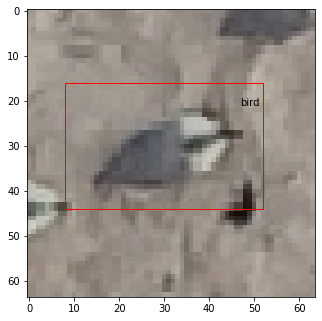

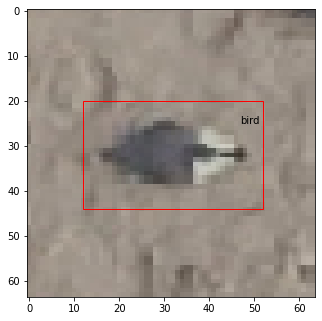

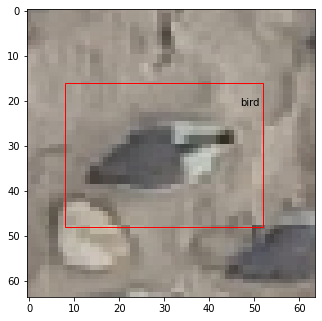

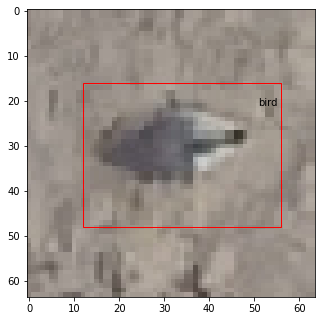

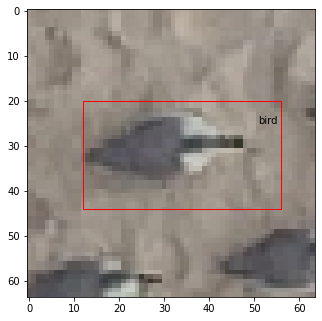

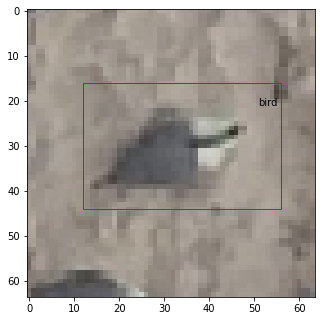

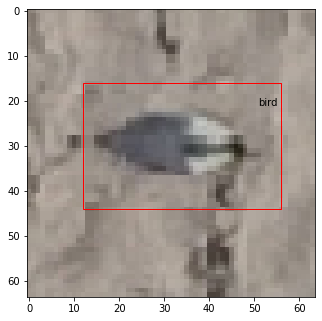

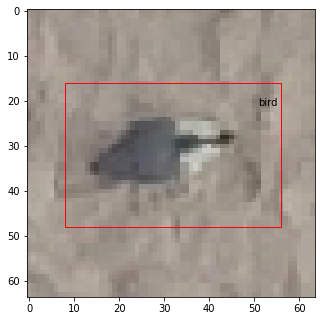

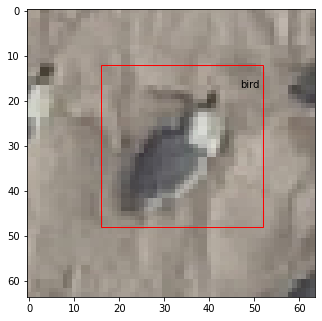

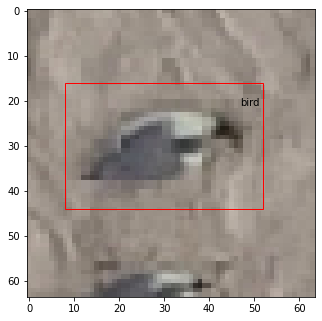

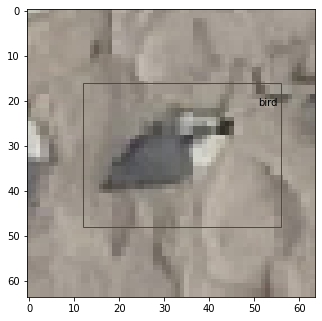

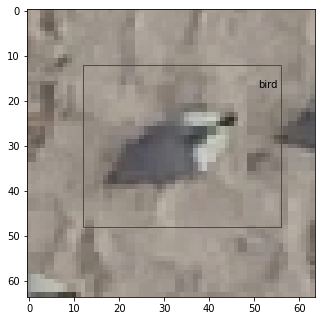

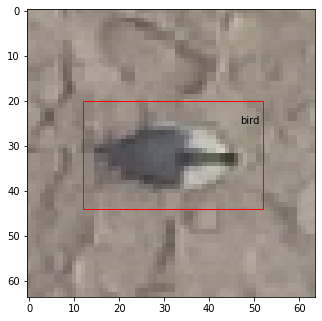

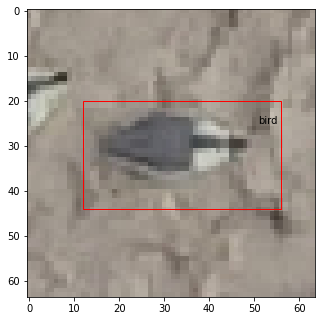

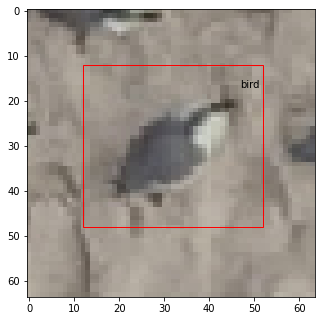

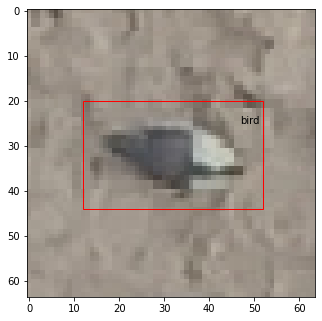

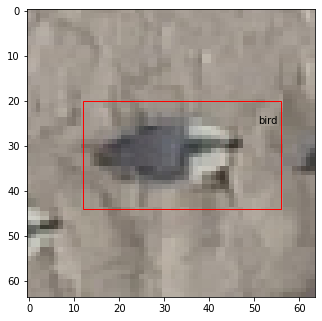

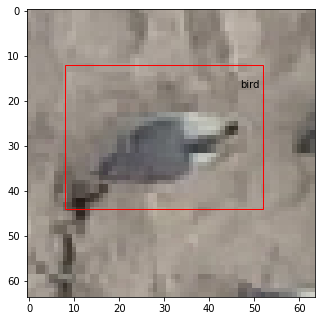

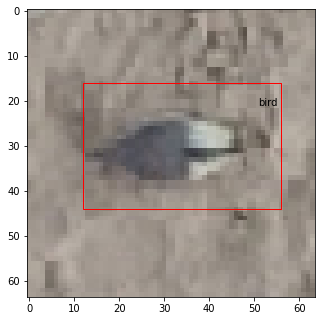

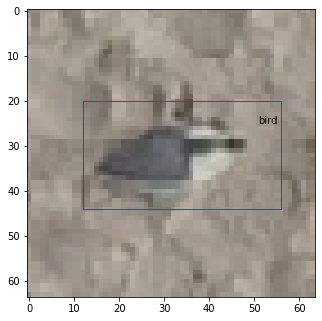

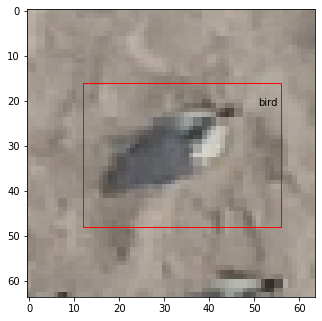

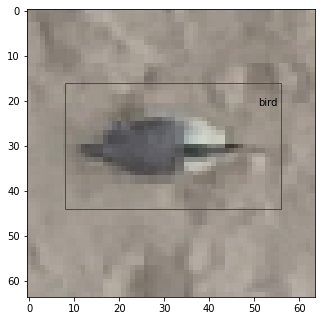

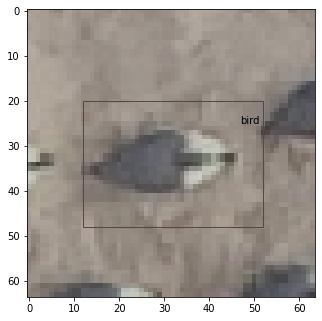

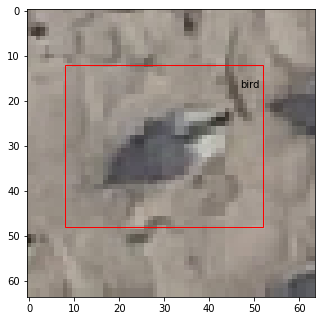

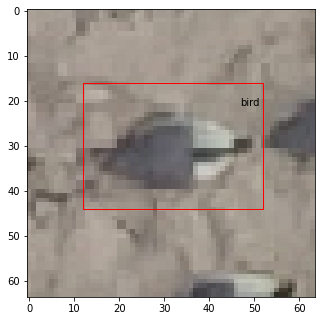

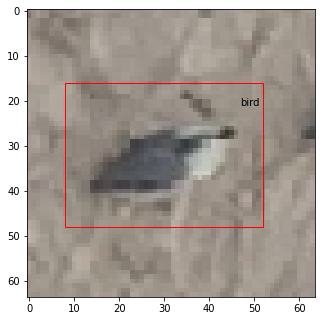

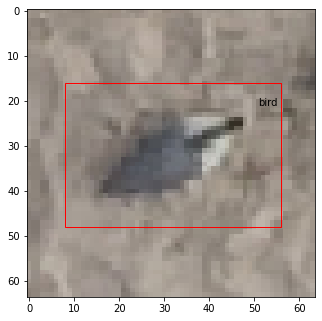

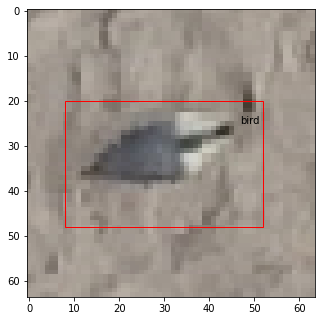

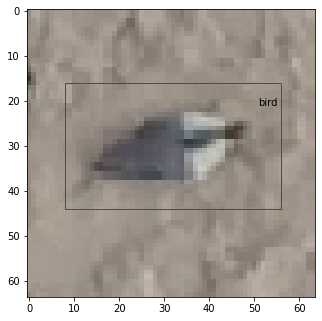

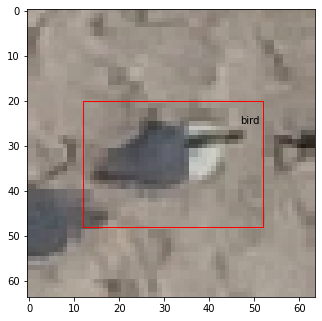

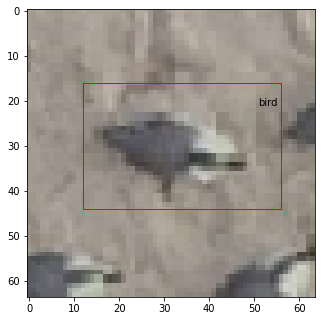

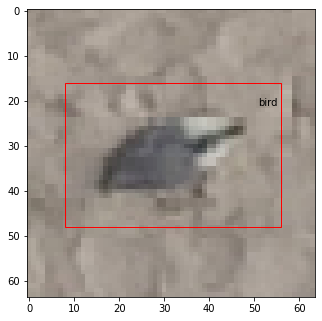

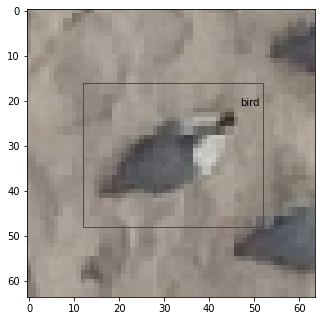

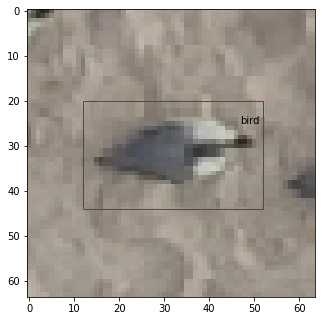

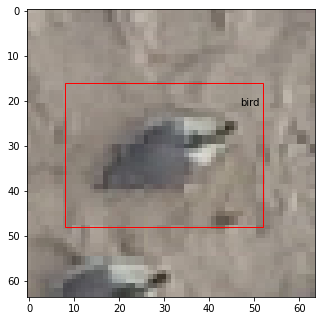

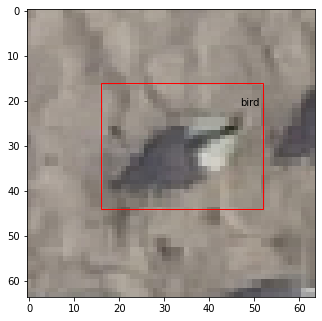

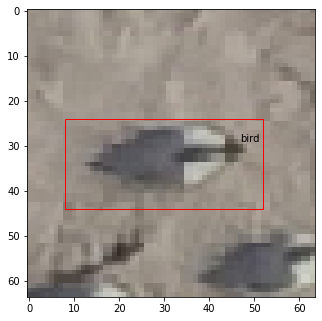

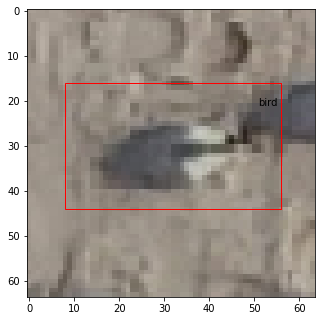

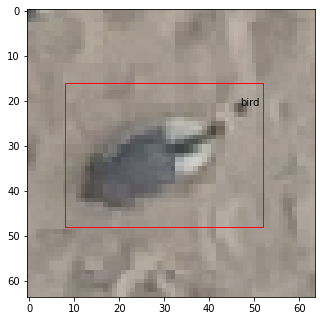

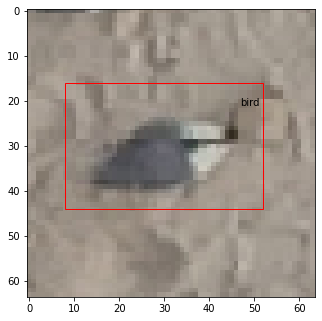

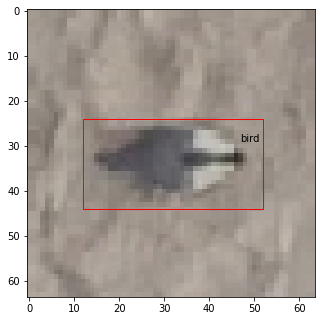

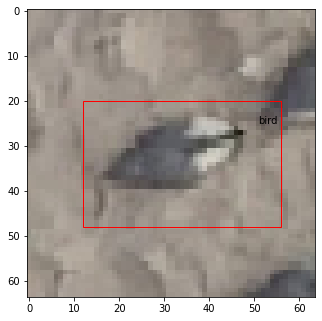

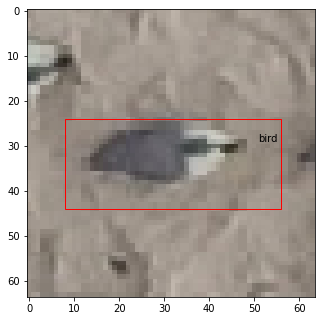

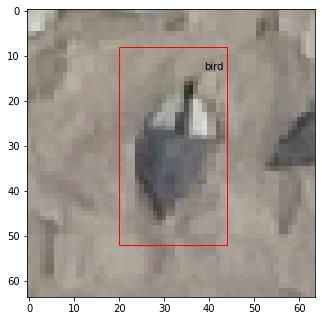

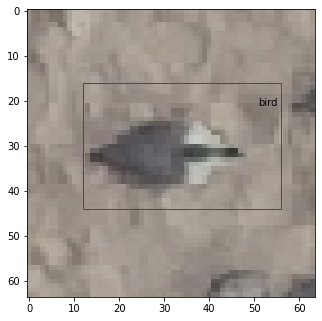

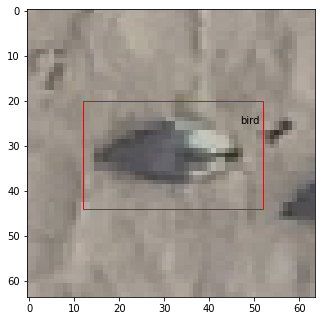

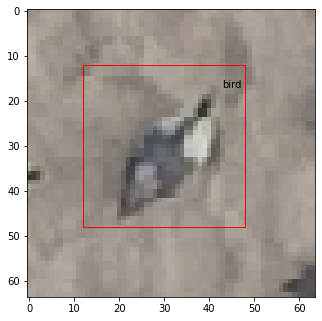

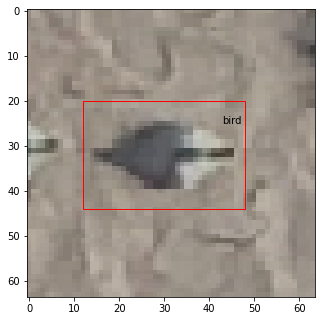

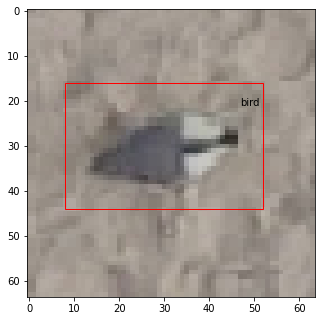

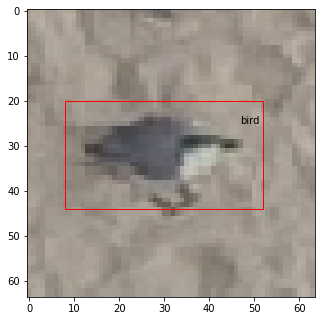

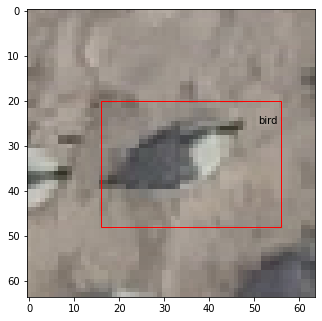

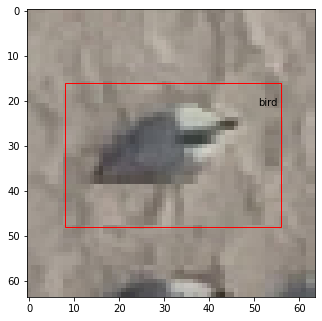

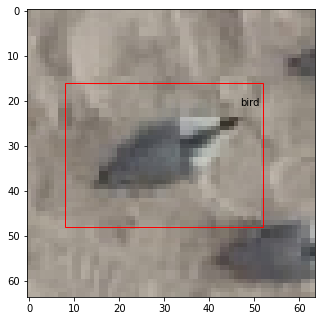

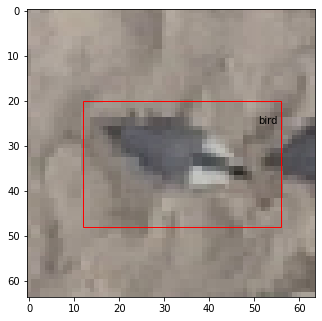

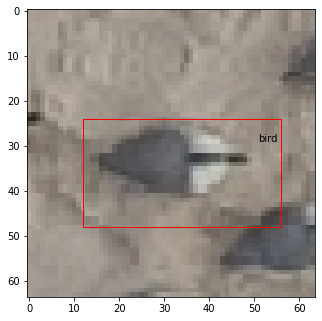

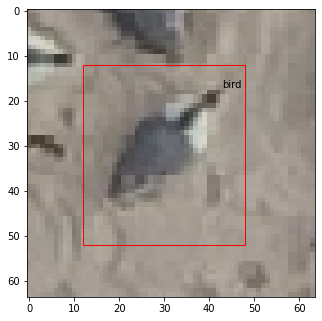

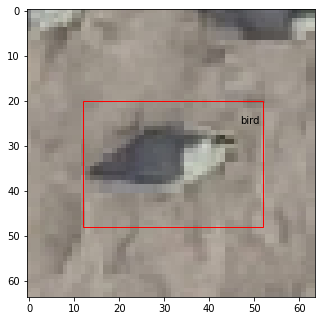

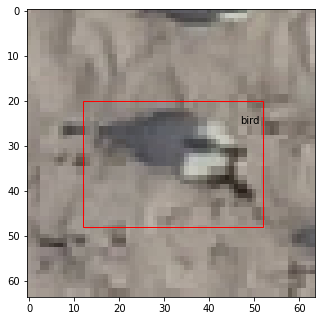

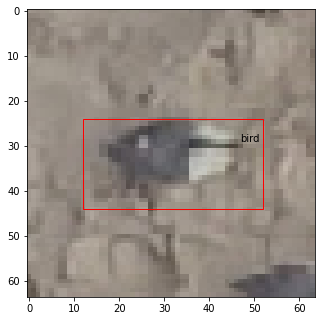

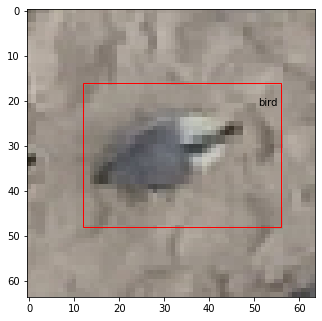

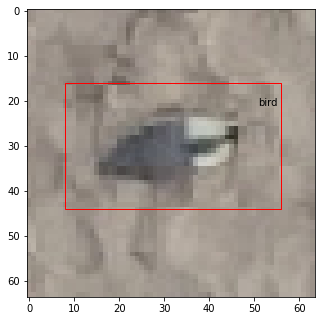

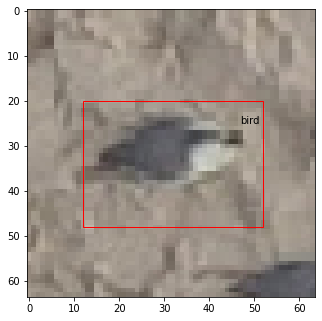

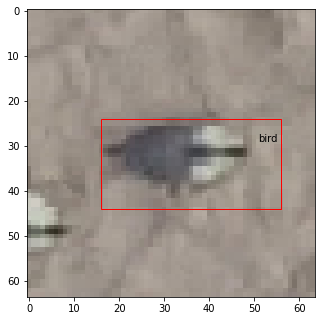

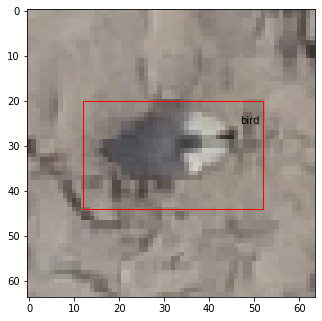

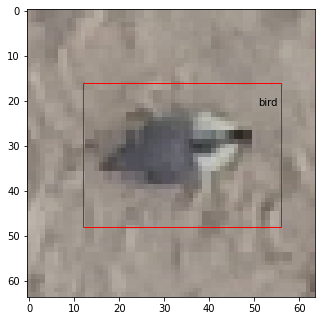

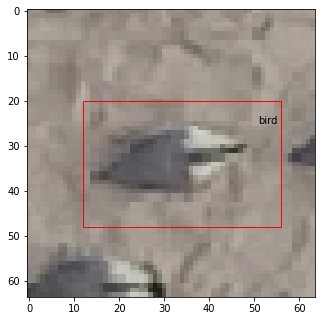

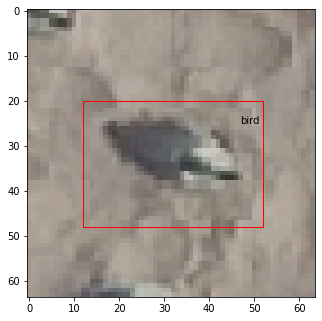

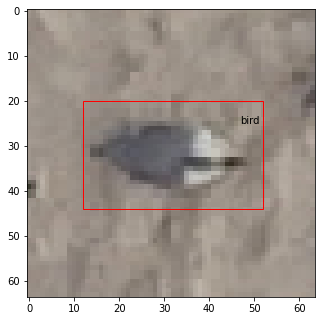

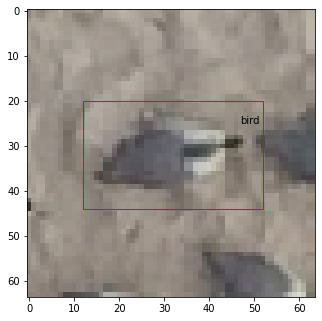

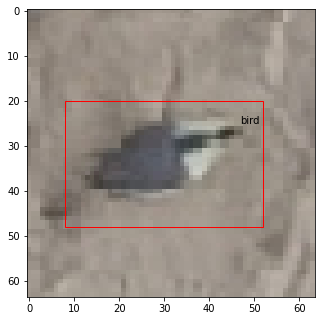

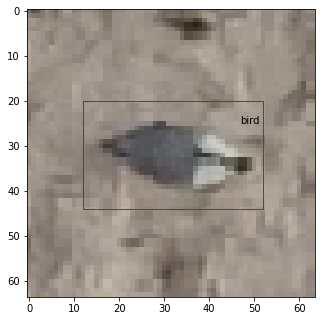

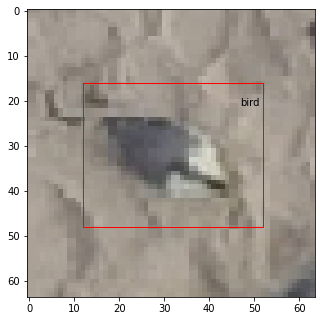

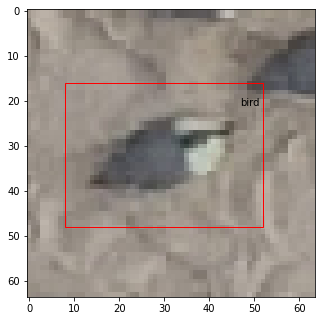

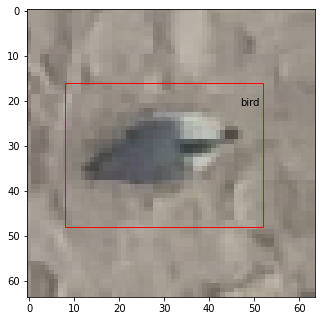

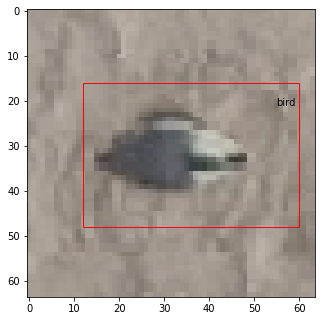

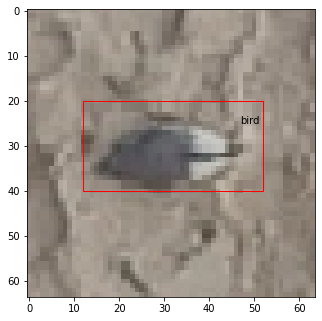

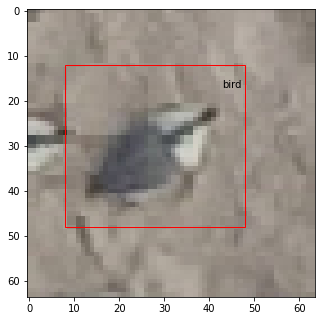

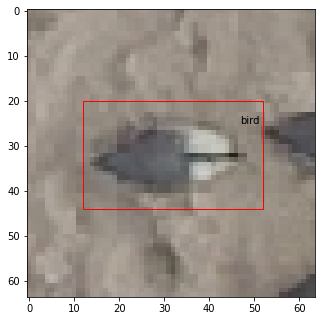

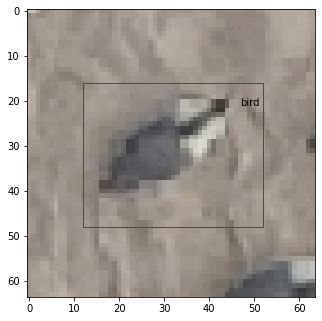

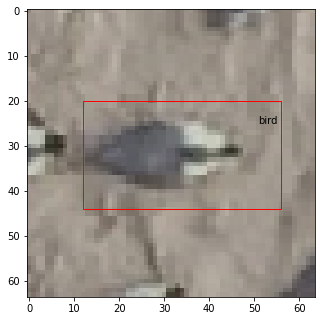

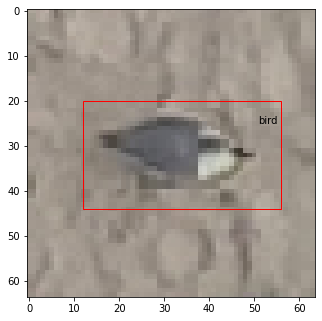

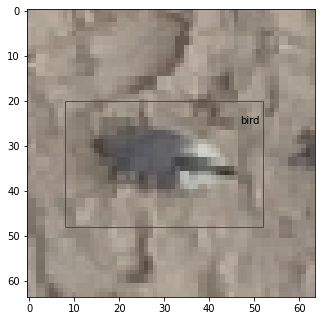

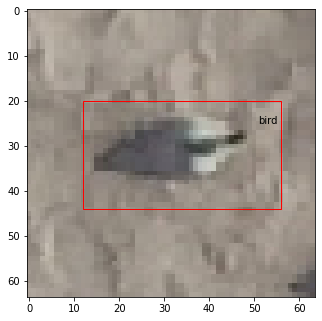

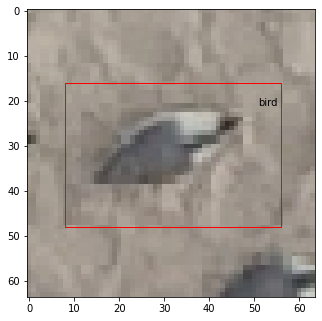

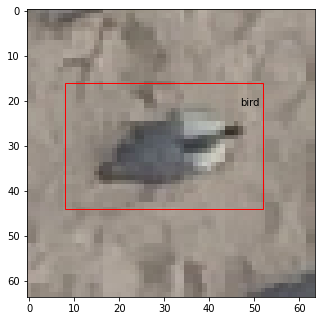

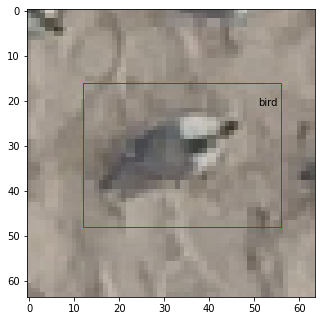

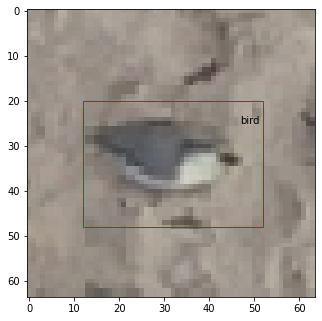

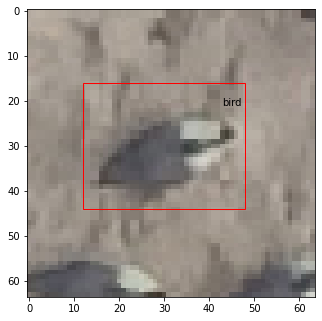

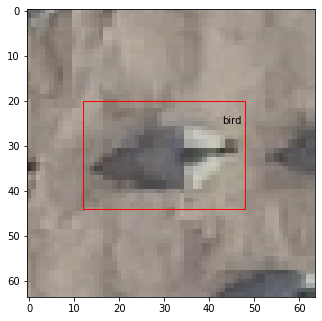

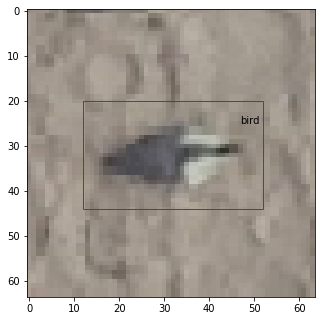

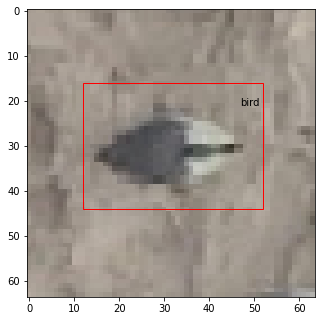

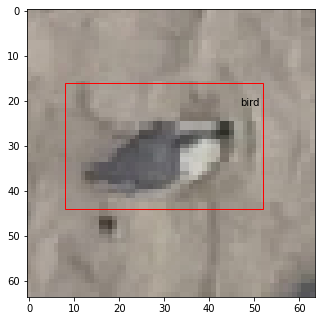

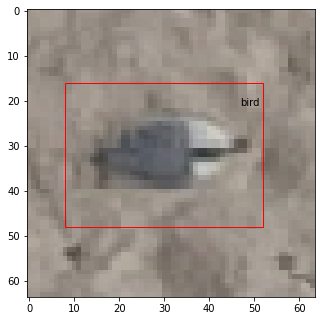

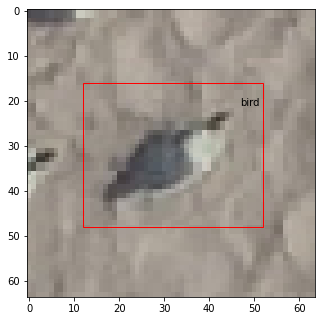

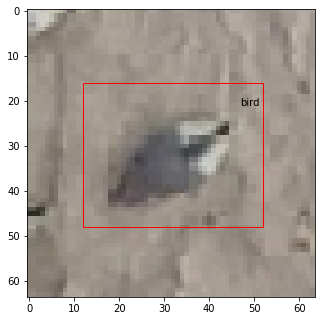

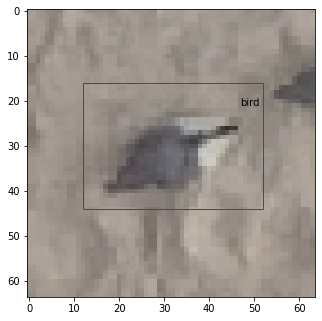

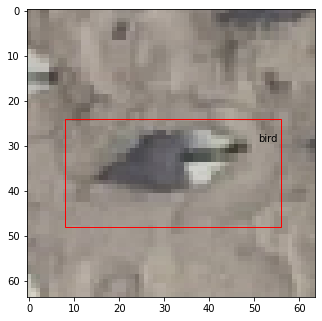

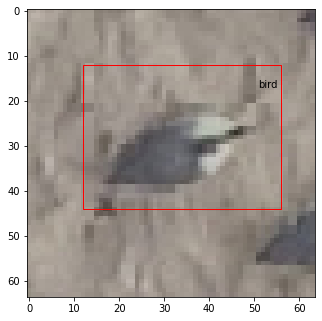

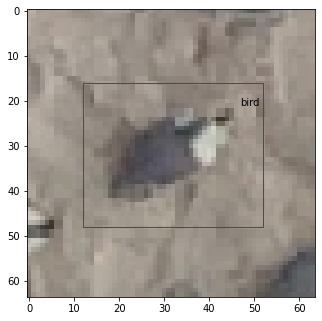

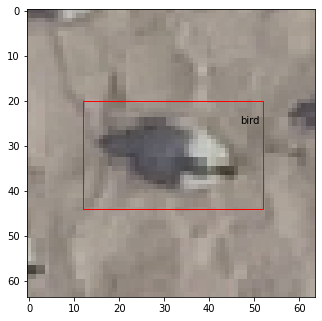

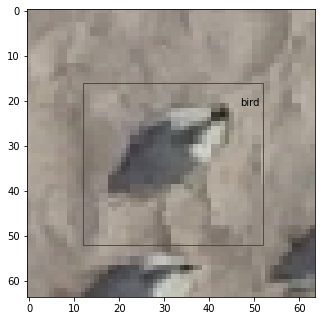

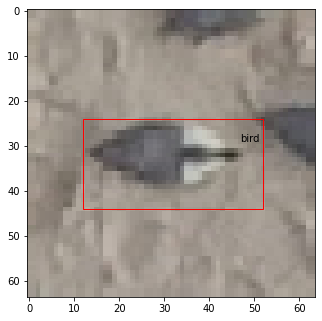

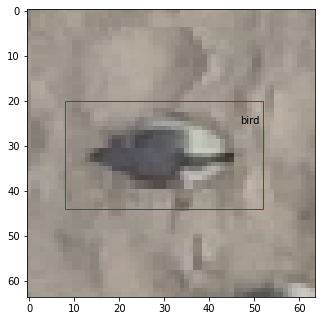

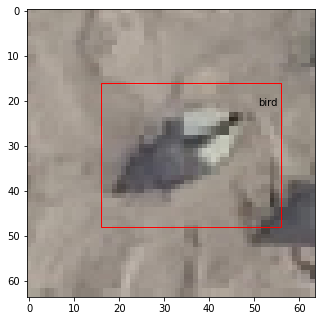

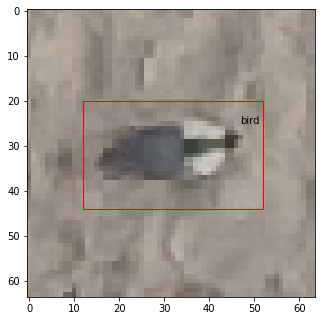

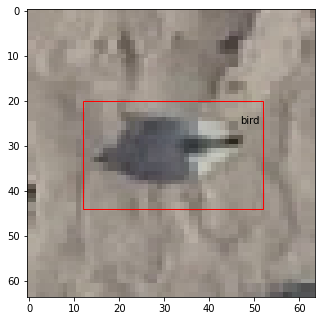

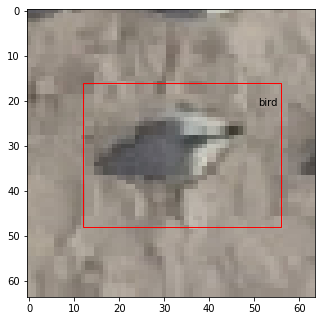

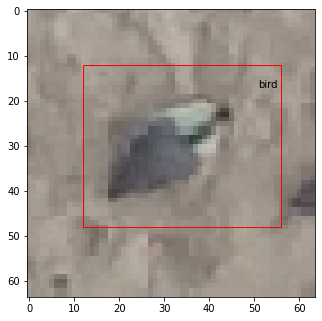

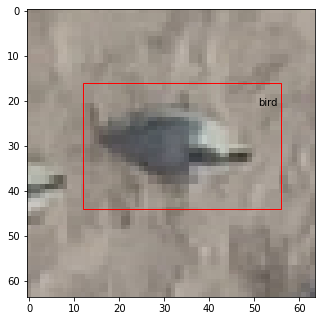

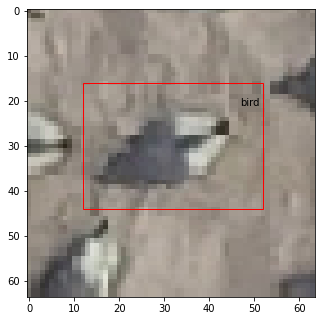

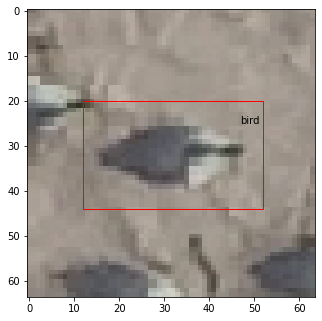

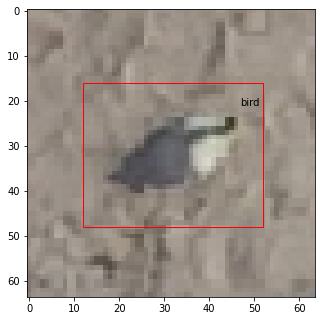

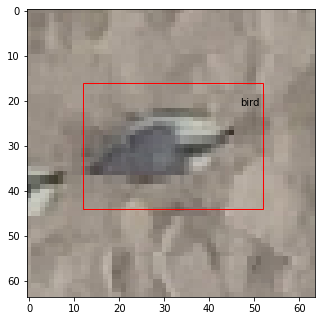

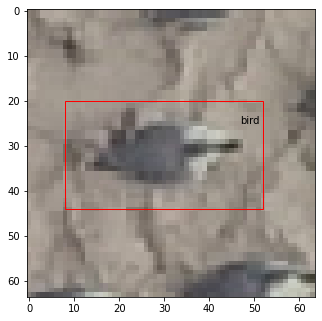

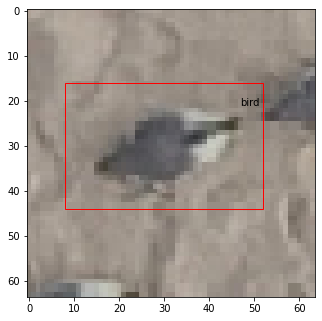

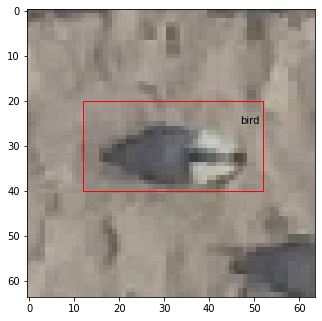

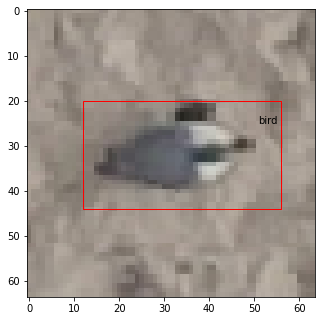

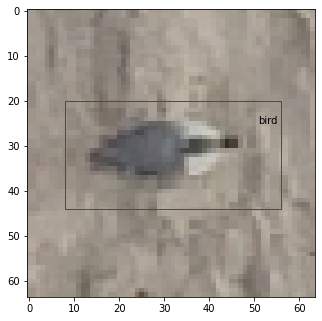

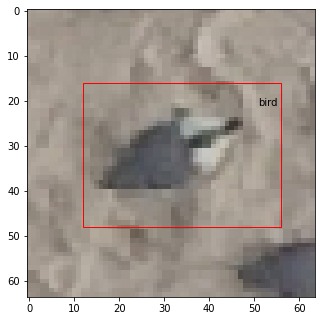

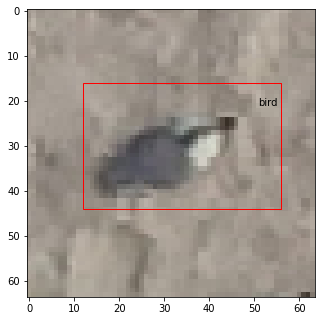

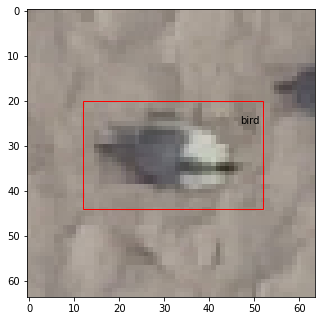

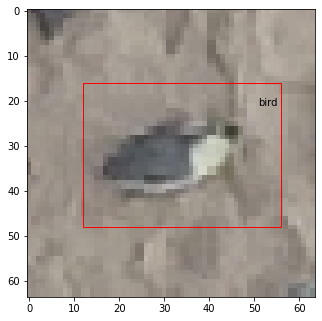

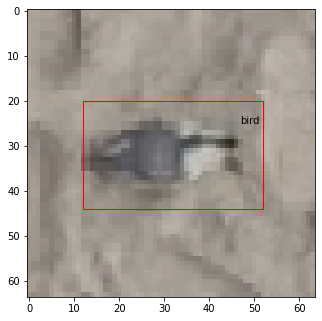

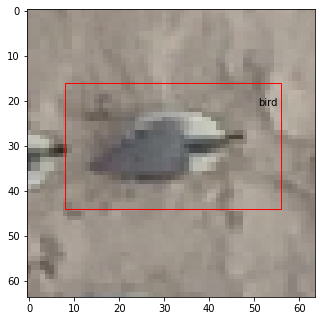

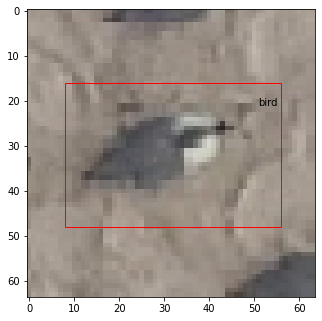

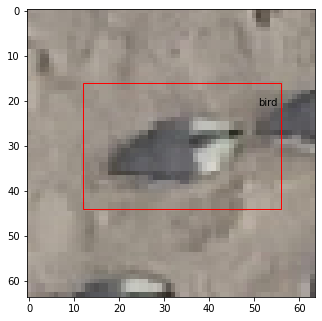

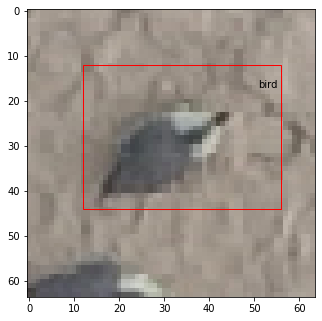

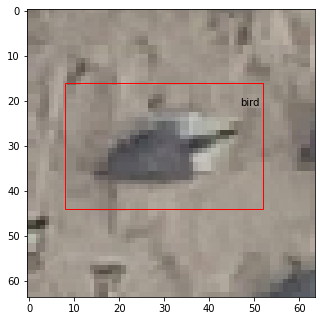

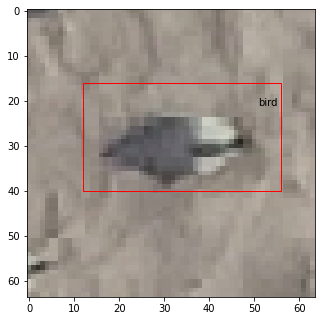

In [63]:
for name in img_names:
    plot_bbox_plt(name)